# Load libraries

In [1]:
# Import libraries
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from nltk.classify import MaxentClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from nltk.stem import WordNetLemmatizer
from keras.layers import Dense, Flatten
from keras.models import Sequential
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from urllib import request
import scipy.linalg as la
import nltk.classify.util
from sklearn import svm
import pandas as pd
import numpy as np
import warnings
import string
import time
import nltk
import re

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels as sm
import os
import graphviz
from urllib import request

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1
Import the Bag of Words datasets from the UCI repository
a. 	Combine all of the datasets into a common corpus
b. 	Create a word-document matrix from this corpus
c. 	Using SKLearn, find the truncated singular value decomposition of this matrix, retaining the first 100 dimensions
                                           	i. 	Are these dimensions interpretable?
                                         	ii. 	What does dimension 1 represent
                                       	iii. 	What do the top 10 dimensions represent?
d. 	Now, retain dimensions 2-101
                                           	i. 	Are these dimensions interpretable?
                                         	ii. 	What does dimension 1 represent
                                       	iii. 	What do the top 10 dimensions represent?
e. 	Determine the centroid of each corpus from the Bag of Words dataset in LSA space.
f.  	Determine the average cosine similarity between documents within in each corpus. Next, determine the average cosine similarity between documents across corpora.
                                           	i. 	Does LSA work well as a tool for clustering corpora?

In [4]:
urls = [
    "https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/vocab.enron.txt",
    "https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/vocab.kos.txt",
    "https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/vocab.nips.txt",
]
labels = ['enron', 'kos', 'nips']

In [5]:
corpus = {}

In [6]:
# functions
for i in range(0, 3):
    # Open the urls
    response = request.urlopen(urls[i])
    # Decode the data
    cleaned_content = response.read().decode('utf8').split('\n')
    cleaned_content = ' '.join(cleaned_content)
    # Store into corpus
    corpus[labels[i]] = cleaned_content
    
for i in corpus.keys():
    print(i+":  "+corpus[i][0:500])

enron:  aaa aaas aactive aadvantage aaker aap aapg aaron aarp aas aau ab1890 ab1x ab31x aba abacus abag abalone abandon abandoned abandoning abandonment abate abated abb abbott abbreviated abbreviation abby abc abcm abdullah abe abel aberdeen abernathy aberration abeyance abhay abhyankar abide abilene abilities ability abitibi able abn abnamro abnormal aboard abolish abolished abolishing abortion abound aboutface aboveaverage abovemarket abovereferenced abraham abramson abreast abroad abrogate abrogatin
kos:  aarp abandon abandoned abandoning abb abc abcs abdullah ability aboard abortion abortions abraham abrams abroad absence absent absentee absolute absolutely abstain absurd abu abuse abuses academy accent accept acceptable acceptance accepted accepting access accident accidentally accidents accomplish accomplished accomplishment account accountability accountable accounting accounts accuracy accurate accurately accusations accused accusing achieve achieved achievements acknowledge a

In [7]:
v = CountVectorizer(ngram_range=(1, 1))
vects = v.fit_transform(corpus.values())

# convert dataset for better estimation
matrix = pd.DataFrame(vects.todense())
matrix.columns = v.get_feature_names_out()

print(matrix)

   a2i  aaa  aaai  aaas  aactive  aadvantage  aaker  aap  aapg  aapo  ...  \
0    0    1     0     1        1           1      1    1     1     0  ...   
1    0    0     0     0        0           0      0    0     0     0  ...   
2    1    1     1     0        0           0      0    0     0     1  ...   

   zoubin  zshop  zucker  zue  zufferli  zukav  zur  zurich  zwislocki  zycher  
0       0      1       0    0         1      1    0       1          0       1  
1       0      0       0    0         0      0    0       0          0       0  
2       1      0       1    1         0      0    1       1          1       0  

[3 rows x 35284 columns]


In [8]:
tmatrix = matrix.T
tmatrix.columns = corpus.keys()

print(tmatrix)

           enron  kos  nips
a2i            0    0     1
aaa            1    0     1
aaai           0    0     1
aaas           1    0     0
aactive        1    0     0
...          ...  ...   ...
zukav          1    0     0
zur            0    0     1
zurich         1    0     1
zwislocki      0    0     1
zycher         1    0     0

[35284 rows x 3 columns]


In [9]:
features = tmatrix.T

svd = TruncatedSVD(n_components=100, n_iter=5, random_state=42)
features = svd.fit_transform(features)

print("Explained Variance: ", svd.explained_variance_)
print("Explained Variance Ratio: ", svd.explained_variance_ratio_)
print("Explained Variance Ratio Sum: ", svd.explained_variance_ratio_.sum())

print("Singular values: ", svd.singular_values_)

Explained Variance:  [2761.76358143 2824.64657583 1569.81206496]
Explained Variance Ratio:  [0.38592479 0.39471197 0.21936324]
Explained Variance Ratio Sum:  0.9999999999999996
Singular values:  [179.12901369 100.71904805  72.07960747]


In [10]:
features_norm = StandardScaler().fit_transform(features)

res = cosine_similarity(features_norm)

print("cosine similarity: ", res)
print("Average cosine similarity: ", np.mean(res))

cosine similarity:  [[ 1.         -0.61908136 -0.56543872]
 [-0.61908136  1.         -0.29767741]
 [-0.56543872 -0.29767741  1.        ]]
Average cosine similarity:  0.003956113817611111


In [11]:
features = tmatrix.T
n_c = min(len(features), len(features.columns))
pca = PCA(n_components=n_c, random_state=42)

# PCA
X_fitted = pca.fit_transform(features)

# Explained Variance and singular values
print("Explained Variance: ", pca.explained_variance_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
print("Explained Variance Ratio Sum: ", pca.explained_variance_ratio_.sum())

print("Singular values: ", pca.singular_values_)

Explained Variance:  [7.50194586e+03 3.23238748e+03 6.17108184e-23]
Explained Variance Ratio:  [6.98873943e-01 3.01126057e-01 5.74891952e-27]
Explained Variance Ratio Sum:  1.0
Singular values:  [1.22490374e+02 8.04038242e+01 1.11095291e-11]


# 2
Apply TF-IDF weighting to the common corpus
a. 	Do steps 1b-1f using this TF-IDF weighted corpus. Do the results change? If so, how and why?

In [34]:
from datetime import timedelta
import os
import random
import time
start = time.time()

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

%matplotlib inline

In [35]:
urls = [
    "https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/vocab.enron.txt",
    "https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/vocab.kos.txt",
    "https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/vocab.nips.txt",
]
labels = ['enron', 'kos', 'nips']

In [36]:
corpus = {}

In [37]:
# functions
for i in range(0, 3):
    # Open the urls
    response = request.urlopen(urls[i])
    # Decode the data
    cleaned_content = response.read().decode('utf8').split('\n')
    cleaned_content = ' '.join(cleaned_content)
    # Store into corpus
    corpus[labels[i]] = cleaned_content
    
for i in corpus.keys():
    print(i+":  "+corpus[i][0:500])

enron:  aaa aaas aactive aadvantage aaker aap aapg aaron aarp aas aau ab1890 ab1x ab31x aba abacus abag abalone abandon abandoned abandoning abandonment abate abated abb abbott abbreviated abbreviation abby abc abcm abdullah abe abel aberdeen abernathy aberration abeyance abhay abhyankar abide abilene abilities ability abitibi able abn abnamro abnormal aboard abolish abolished abolishing abortion abound aboutface aboveaverage abovemarket abovereferenced abraham abramson abreast abroad abrogate abrogatin
kos:  aarp abandon abandoned abandoning abb abc abcs abdullah ability aboard abortion abortions abraham abrams abroad absence absent absentee absolute absolutely abstain absurd abu abuse abuses academy accent accept acceptable acceptance accepted accepting access accident accidentally accidents accomplish accomplished accomplishment account accountability accountable accounting accounts accuracy accurate accurately accusations accused accusing achieve achieved achievements acknowledge a

In [38]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(corpus)

In [40]:
print("Vocab: ", vectorizer.get_feature_names_out())
print("IDF: ", vectorizer.idf_)

print("Tf-idf matrix: ", tfidf_matrix.toarray())

Vocab:  ['enron' 'kos' 'nips']
IDF:  [1.69314718 1.69314718 1.69314718]
Tf-idf matrix:  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# 3
Do the sample PCA assignment at http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#introduction

In [ ]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

sepal_len  sepal_wid  petal_len  petal_wid           class
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica

In [ ]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

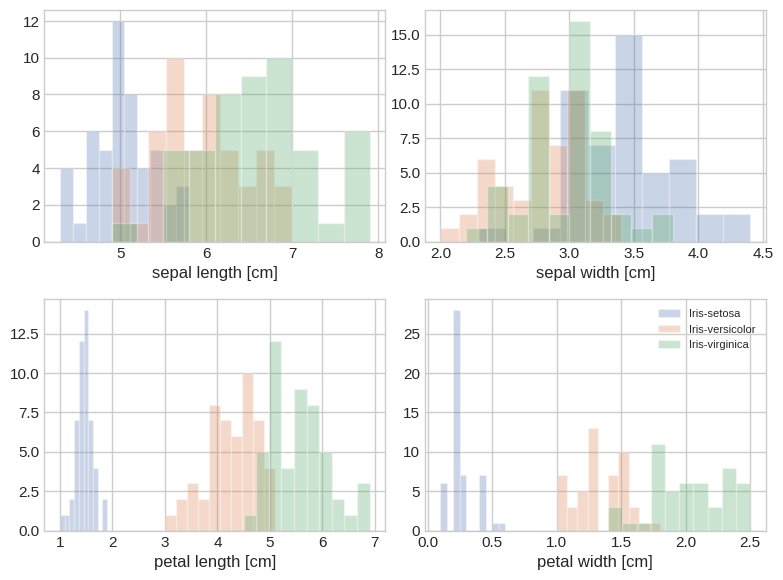

In [ ]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [ ]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [ ]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [ ]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [ ]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [ ]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520528
0.9212209307072249
0.1473532783050959
0.020607707235624884


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

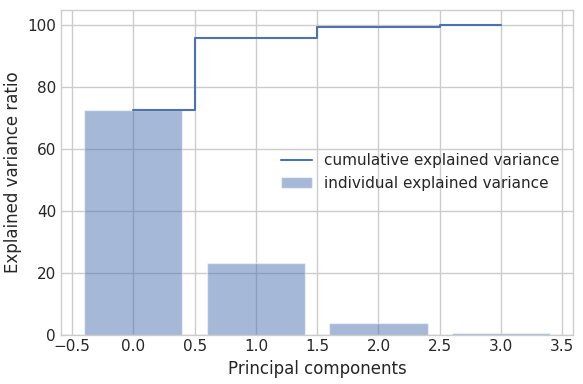

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [ ]:
Y = X_std.dot(matrix_w)

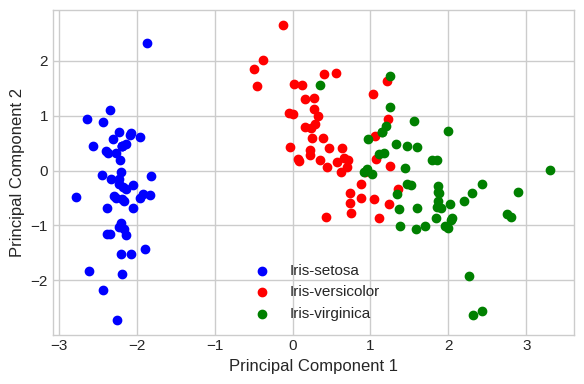

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

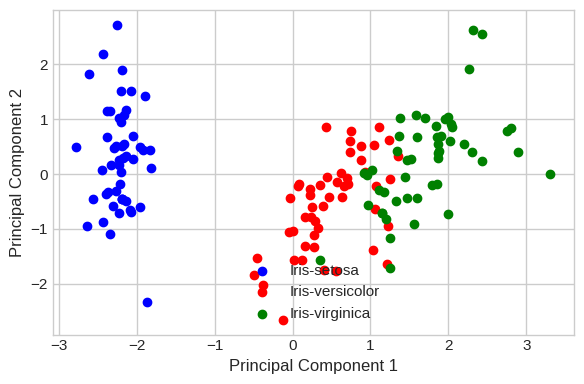

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

# 4
Do the sample PCA demo at http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html#example-applications-face-recognition-py

In [ ]:
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.347s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.033s


In [ ]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 18.257s
Best estimator found by grid search:
SVC(C=39081.00400892254, class_weight='balanced', gamma=0.0029798050017081743)


Predicting people's names on the test set
done in 0.282s
                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.62      0.62        13
     Colin Powell       0.75      0.87      0.81        60
  Donald Rumsfeld       0.76      0.70      0.73        27
    George W Bush       0.92      0.96      0.94       146
Gerhard Schroeder       0.91      0.80      0.85        25
      Hugo Chavez       0.90      0.60      0.72        15
       Tony Blair       0.93      0.78      0.85        36

         accuracy                           0.86       322
        macro avg       0.83      0.76      0.79       322
     weighted avg       0.86      0.86      0.86       322



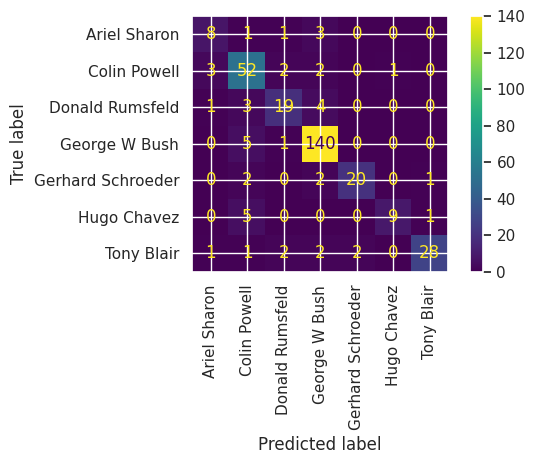

In [ ]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

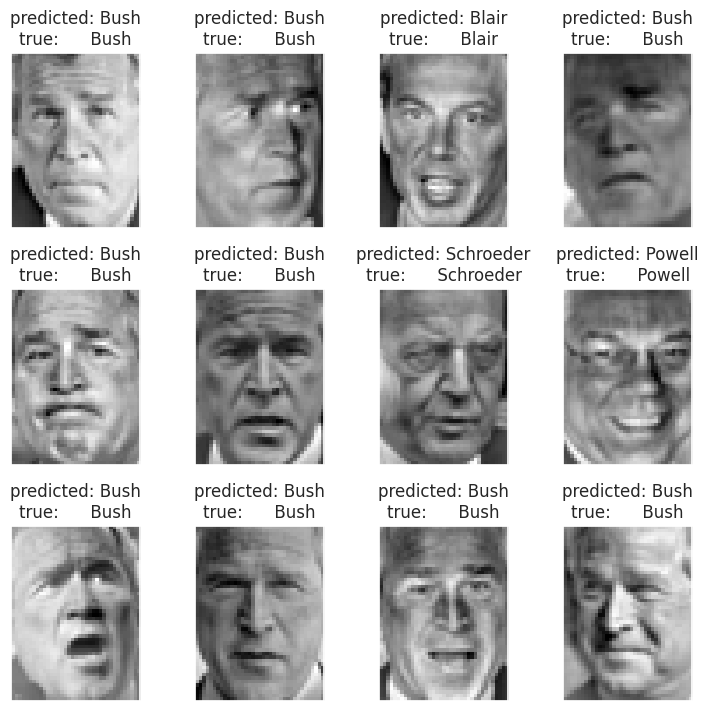

In [ ]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

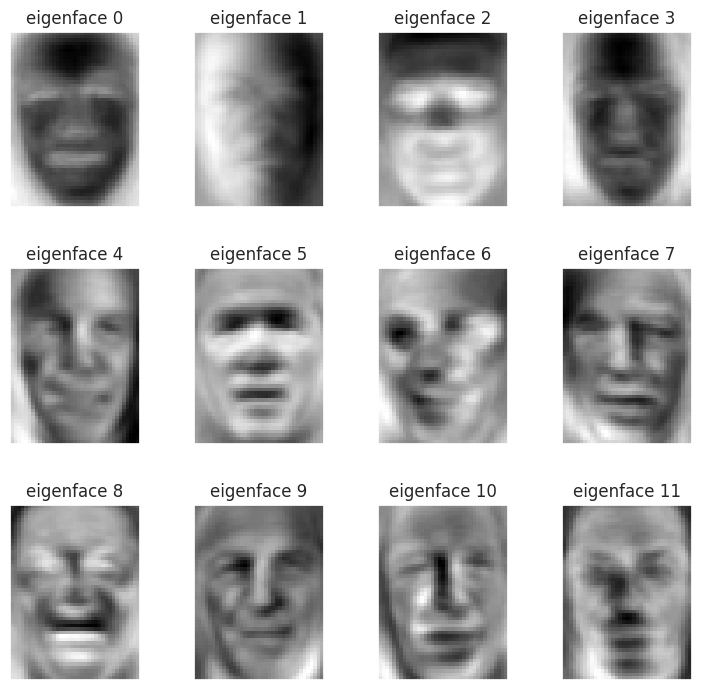

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

# 5

In each of these cases, the total number of principal components was given to you as part of the assignment. Now, your task is to determine how many principal components to retain. Import the data from https://archive.ics.uci.edu/ml/datasets/Housing
a. 	Generate the covariance matrix of this dataset (don’t forget to normalize and center your data!)
                                           	i. 	Which variables strongly covary?
b. 	Calculate the eigenvalues of the covariance matrix
                                           	i. 	Generate a scree plot of the eigenvalues
c. 	Using the screeplot, perform a Principal Component Analysis of the data
                                           	i. 	Technique #1: Choose the number of components based on how many eigenvalues are greater than 1.0. How much variance does this approach explain?
                                         	ii. 	Technique #2: After examining the screeplot, identify the “knee in the curve” – choose the number of components at this location. How much variance does this approach explain?
                                       	iii. 	What is the advantage of Technique #1 over Technique #2 and vice versa?
d. 	Examine the factors resulting from your preferred PCA. How would you explain these factors?

In [ ]:
from sklearn import datasets
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import warnings

In [ ]:
import pandas as pd  # doctest: +SKIP
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
df = pd.DataFrame(data)

In [ ]:
normalized_df = (df - df.mean()) / df.std()

In [ ]:
cov = df.cov()

# Print cov to see how it looks like
cov

0            1           2         3          4          5   \
0    73.986578   -40.215956   23.992339 -0.122109   0.419594  -1.325038   
1   -40.215956   543.936814  -85.412648 -0.252925  -1.396148   5.112513   
2    23.992339   -85.412648   47.064442  0.109669   0.607074  -1.887957   
3    -0.122109    -0.252925    0.109669  0.064513   0.002684   0.016285   
4     0.419594    -1.396148    0.607074  0.002684   0.013428  -0.024603   
5    -1.325038     5.112513   -1.887957  0.016285  -0.024603   0.493671   
6    85.405322  -373.901548  124.513903  0.618571   2.385927  -4.751929   
7    -6.876722    32.629304  -10.228097 -0.053043  -0.187696   0.303663   
8    46.847761   -63.348695   35.549971 -0.016296   0.616929  -1.283815   
9   844.821538 -1236.453735  833.360290 -1.523367  13.046286 -34.583448   
10    5.399331   -19.776571    5.692104 -0.066819   0.047397  -0.540763   
11 -302.381816   373.721402 -223.579756  1.131325  -4.020570   8.215006   
12   27.986168   -68.783037   29.580270 -0.097816   0.488946  -3.079741   

             6           7            8             9           10  \
0     85.405322   -6.876722    46.847761    844.821538    5.399331   
1   -373.901548   32.629304   -63.348695  -1236.453735  -19.776571   
2    124.513903  -10.228097    35.549971    833.360290    5.692104   
3      0.618571   -0.053043    -0.016296     -1.523367   -0.066819   
4      2.385927   -0.187696     0.616929     13.046286    0.047397   
5     -4.751929    0.303663    -1.283815    -34.583448   -0.540763   
6    792.358399  -44.329379   111.770846   2402.690122   15.936921   
7    -44.329379    4.434015    -9.068252   -189.664592   -1.059775   
8    111.770846   -9.068252    75.816366   1335.756577    8.760716   
9   2402.690122 -189.664592  1335.756577  28404.759488  168.153141   
10    15.936921   -1.059775     8.760716    168.153141    4.686989   
11  -702.940328   56.040356  -353.276219  -6797.911215  -35.059527   
12   121.077725   -7.473329    30.385442    654.714520    5.782729   

             11          12  
0   -302.381816   27.986168  
1    373.721402  -68.783037  
2   -223.579756   29.580270  
3      1.131325   -0.097816  
4     -4.020570    0.488946  
5      8.215006   -3.079741  
6   -702.940328  121.077725  
7     56.040356   -7.473329  
8   -353.276219   30.385442  
9  -6797.911215  654.714520  
10   -35.059527    5.782729  
11  8334.752263 -238.667516  
12  -238.667516   50.994760

In [ ]:
df.corr()[abs(df.corr()) > 0.5]

0         1         2    3         4         5         6         7   \
0   1.000000       NaN       NaN  NaN       NaN       NaN       NaN       NaN   
1        NaN  1.000000 -0.533828  NaN -0.516604       NaN -0.569537  0.664408   
2        NaN -0.533828  1.000000  NaN  0.763651       NaN  0.644779 -0.708027   
3        NaN       NaN       NaN  1.0       NaN       NaN       NaN       NaN   
4        NaN -0.516604  0.763651  NaN  1.000000       NaN  0.731470 -0.769230   
5        NaN       NaN       NaN  NaN       NaN  1.000000       NaN       NaN   
6        NaN -0.569537  0.644779  NaN  0.731470       NaN  1.000000 -0.747881   
7        NaN  0.664408 -0.708027  NaN -0.769230       NaN -0.747881  1.000000   
8   0.625505       NaN  0.595129  NaN  0.611441       NaN       NaN       NaN   
9   0.582764       NaN  0.720760  NaN  0.668023       NaN  0.506456 -0.534432   
10       NaN       NaN       NaN  NaN       NaN       NaN       NaN       NaN   
11       NaN       NaN       NaN  NaN       NaN       NaN       NaN       NaN   
12       NaN       NaN  0.603800  NaN  0.590879 -0.613808  0.602339       NaN   

          8         9    10   11        12  
0   0.625505  0.582764  NaN  NaN       NaN  
1        NaN       NaN  NaN  NaN       NaN  
2   0.595129  0.720760  NaN  NaN  0.603800  
3        NaN       NaN  NaN  NaN       NaN  
4   0.611441  0.668023  NaN  NaN  0.590879  
5        NaN       NaN  NaN  NaN -0.613808  
6        NaN  0.506456  NaN  NaN  0.602339  
7        NaN -0.534432  NaN  NaN       NaN  
8   1.000000  0.910228  NaN  NaN       NaN  
9   0.910228  1.000000  NaN  NaN  0.543993  
10       NaN       NaN  1.0  NaN       NaN  
11       NaN       NaN  NaN  1.0       NaN  
12       NaN  0.543993  NaN  NaN  1.000000

[3.08899113e+04+0.j 6.25033006e+03+0.j 8.18363958e+02+0.j
 2.66684838e+02+0.j 4.98315275e+01+0.j 2.78767934e+01+0.j
 1.60633859e+01+0.j 9.52731770e+00+0.j 3.27333185e+00+0.j
 1.18094181e+00+0.j 2.55155742e-01+0.j 6.00984544e-02+0.j
 3.05445673e-03+0.j]


/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Scree Plot of Eigenvalues')

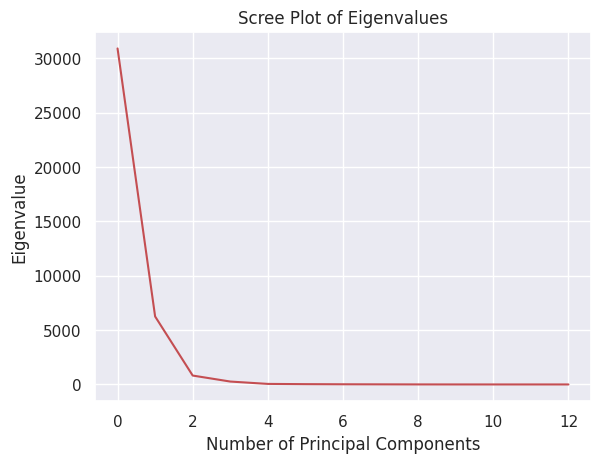

In [ ]:
x, y = la.eig(cov)

# Print eigenvalues to see how it looks like
print(x)

# Generate a scree plot of the eigenvalues
plt.plot(x, color='r')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot of Eigenvalues')

Eigenvalues:  [3.08899113e+04 6.25033006e+03 8.18363958e+02 2.66684838e+02
 4.98315275e+01 2.78767934e+01 1.60633859e+01 9.52731770e+00
 3.27333185e+00 1.18094181e+00]


Text(0.5, 1.0, 'Scree Plot of PCA1')

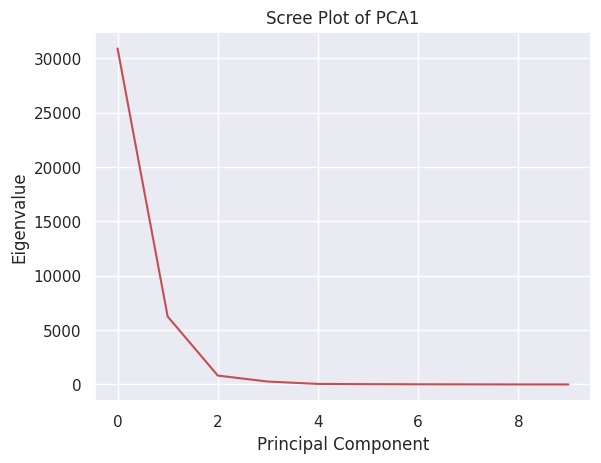

In [ ]:
n = len(x[x>1.0])

# Perform a Principal Component Analysis of the data 
pca1 = PCA(n_components = n)
    
# Transform the principal components on the feature set
pca1.fit(df).transform(df)

# Print explained variance
print('Eigenvalues: ',pca1.explained_variance_)

# Generate a scree plot
plt.plot(pca1.explained_variance_, color='r')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot of PCA1')

Eigenvalues:  [30889.91126082  6250.3300614 ]


Text(0.5, 1.0, 'Scree Plot of PCA2')

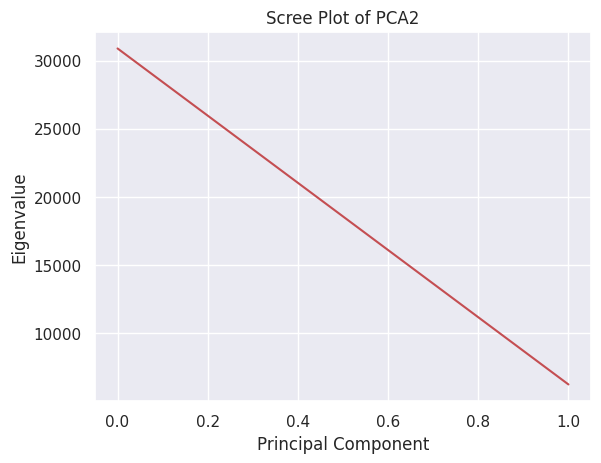

In [ ]:
n = 2

# use PCA with the knee value
pca2 = PCA(n_components = n)
    
# Transform the principal components on the feature set
pca2.fit(df).transform(df)

# Print explained variance
print('Eigenvalues: ',pca2.explained_variance_)

# Generate a scree plot
plt.plot(pca2.explained_variance_, color='r')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot of PCA2')

It is better to use first PCA which scree plot seems to have an elbow for determining the n component for pca modeling.

# 6
Extra credit: Collect data from a source of your choice and run a PCA. Provide a one-page writeup explaining the meaning of the resulting decomposition.

In [ ]:
path = "/content/drive/My Drive/EMSE6575/heart.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [ ]:
df['restecg'].unique()

array([1, 0, 2])

In [ ]:
X = df.iloc[:,0:13].values
Y = df.iloc[:,13].values

In [ ]:
X.shape, Y.shape

((1025, 13), (1025,))

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
scaled_X = scale(X)

In [ ]:
pca = PCA(n_components=13)

pca.fit(X)

PCA(n_components=13)

In [ ]:
def showVarianceRatio(pca):
    exp_ratio_var = pca.explained_variance_ratio_
    var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    plt.plot(var1)

In [ ]:
exp_ratio_var = pca.explained_variance_ratio_
exp_ratio_var

array([7.45309312e-01, 1.51991744e-01, 8.49275120e-02, 1.65008210e-02,
       3.93671051e-04, 2.78867029e-04, 2.34619083e-04, 1.02861340e-04,
       7.80327890e-05, 5.91555296e-05, 5.06632190e-05, 4.14260877e-05,
       3.13145430e-05])

In [ ]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

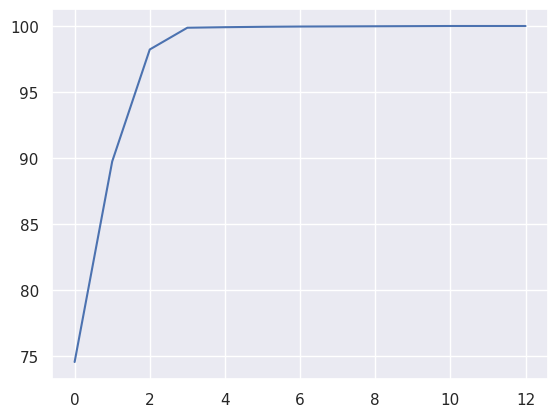

In [ ]:
plt.plot(var1)

In [ ]:
pca2 = PCA(n_components=3)
pca2.fit(X)
X1=pca2.fit_transform(X)

In [ ]:
X1.shape

(1025, 3)

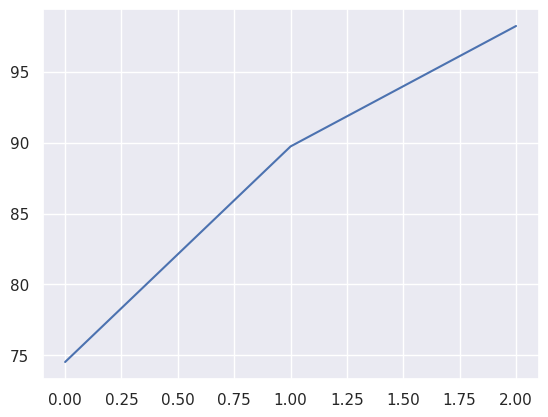

In [ ]:
showVarianceRatio(pca2)

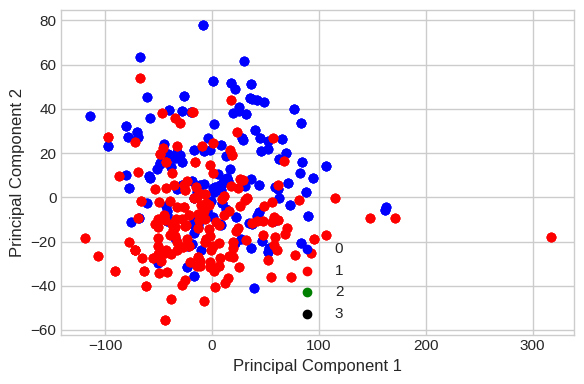

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2, 3),
                        ('blue', 'red', 'green', 'black')):
        plt.scatter(X1[Y==lab, 0],
                    X1[Y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

PCA is extracting a new set of variables from existing large set of variables. In this dataset, first PCA used for maximum variance in the data and second PCA is to remaining variance in the dataset that is uncorrelated with the first one.

# 7
Do the sample k-means clustering demo at: http://scikit-learn.org/stable/auto_examples/text/document_clustering.html
a. 	This demo first uses LSA to carry out dimensionality reduction before clustering. What is the difference between the results obtained using just LSA and the results obtained using LSA + k-means?
b. 	Do the clustering again, only without performing LSA first.  Are the results the same? If not, why not? Which result gives more meaningful clusters and why?

In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

dataset = fetch_20newsgroups(
    remove=("headers", "footers", "quotes"),
    subset="all",
    categories=categories,
    shuffle=True,
    random_state=42,
)

labels = dataset.target
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")

3387 documents - 4 categories


In [ ]:
from collections import defaultdict
from sklearn import metrics
from time import time

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)
t0 = time()
X_tfidf = vectorizer.fit_transform(dataset.data)

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.594 s
n_samples: 3387, n_features: 7929


In [ ]:
print(f"{X_tfidf.nnz / np.prod(X_tfidf.shape):.3f}")

0.007


In [ ]:
from sklearn.cluster import KMeans

for seed in range(5):
    kmeans = KMeans(
        n_clusters=true_k,
        max_iter=100,
        n_init=1,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements asigned to each cluster: {cluster_sizes}")
print()
print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)

Number of elements asigned to each cluster: [   1    1 3384    1]
Number of elements asigned to each cluster: [1597  732  233  825]
Number of elements asigned to each cluster: [2004  446  646  291]
Number of elements asigned to each cluster: [1695  649  446  597]
Number of elements asigned to each cluster: [ 254 2117  459  557]

True number of documents in each category according to the class labels: [799 973 987 628]


In [ ]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=5,
)

fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non tf-idf vectors")


clustering done in 0.29 ± 0.09 s 
Homogeneity: 0.336 ± 0.026
Completeness: 0.400 ± 0.008
V-measure: 0.365 ± 0.014
Adjusted Rand-Index: 0.202 ± 0.012
Silhouette Coefficient: 0.007 ± 0.000


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))
t0 = time()
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"LSA done in {time() - t0:.3f} s")
print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

LSA done in 1.212 s
Explained variance of the SVD step: 18.4%


In [ ]:
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1,
)

fit_and_evaluate(kmeans, X_lsa, name="KMeans\nwith LSA on tf-idf vectors")

clustering done in 0.41 ± 0.21 s 
Homogeneity: 0.404 ± 0.003
Completeness: 0.443 ± 0.018
V-measure: 0.422 ± 0.009
Adjusted Rand-Index: 0.340 ± 0.033
Silhouette Coefficient: 0.029 ± 0.001


In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(
    n_clusters=true_k,
    n_init=1,
    init_size=1000,
    batch_size=1000,
)

fit_and_evaluate(
    minibatch_kmeans,
    X_lsa,
    name="MiniBatchKMeans\nwith LSA on tf-idf vectors",
)

clustering done in 0.12 ± 0.05 s 
Homogeneity: 0.370 ± 0.060
Completeness: 0.404 ± 0.023
V-measure: 0.385 ± 0.044
Adjusted Rand-Index: 0.349 ± 0.086
Silhouette Coefficient: 0.026 ± 0.003


In [ ]:
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]} ", end="")
    print()

Cluster 0: thanks graphics image know files file program looking software edu 
Cluster 1: god jesus bible believe christian people say faith christians does 
Cluster 2: space launch orbit shuttle nasa earth moon like mission satellite 
Cluster 3: don just think people like know say time does ve 


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

lsa_vectorizer = make_pipeline(
    HashingVectorizer(stop_words="english", n_features=50_000),
    TfidfTransformer(),
    TruncatedSVD(n_components=100, random_state=0),
    Normalizer(copy=False),
)

t0 = time()
X_hashed_lsa = lsa_vectorizer.fit_transform(dataset.data)
print(f"vectorization done in {time() - t0:.3f} s")

vectorization done in 4.618 s


In [ ]:
fit_and_evaluate(kmeans, X_hashed_lsa, name="KMeans\nwith LSA on hashed vectors")

clustering done in 0.51 ± 0.41 s 
Homogeneity: 0.405 ± 0.003
Completeness: 0.456 ± 0.004
V-measure: 0.429 ± 0.003
Adjusted Rand-Index: 0.330 ± 0.008
Silhouette Coefficient: 0.030 ± 0.001


In [ ]:
fit_and_evaluate(
    minibatch_kmeans,
    X_hashed_lsa,
    name="MiniBatchKMeans\nwith LSA on hashed vectors",
)

clustering done in 0.73 ± 0.30 s 
Homogeneity: 0.363 ± 0.063
Completeness: 0.375 ± 0.063
V-measure: 0.369 ± 0.062
Adjusted Rand-Index: 0.324 ± 0.067
Silhouette Coefficient: 0.025 ± 0.005


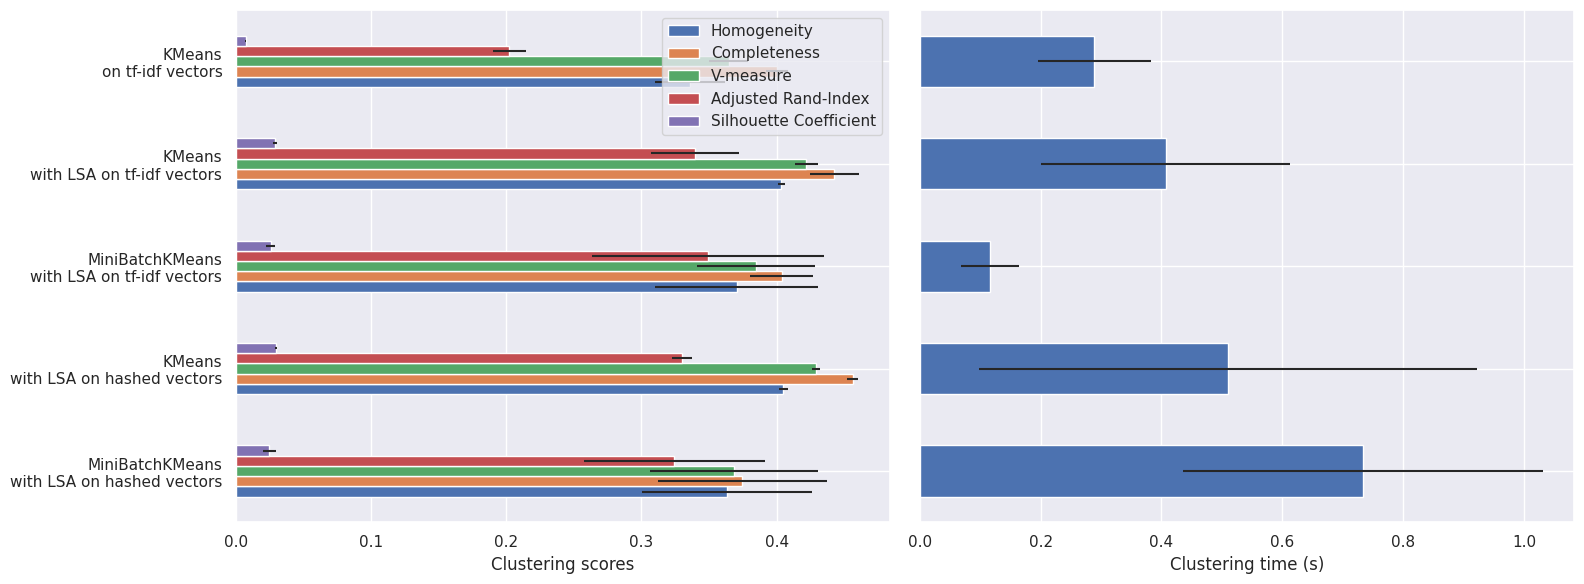

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")
plt.tight_layout()

In [ ]:
#What is the difference between the results obtained using just LSA and the results obtained using LSA + k-means?
#b. Do the clustering again, only without performing LSA first. Are the results the same?
#If not, why not? Which result gives more meaningful clusters and why?

In [ ]:
print("Difference between the results that LSA+ K means have a longer clustering time. Due to the Curse of Dimensionality, overall scores improved when using LSA. Without performing LSA, the result might have lower stability and results higher clustering time.")

Difference between the results that LSA+ K means have a longer clustering time. Due to the Curse of Dimensionality, overall scores improved when using LSA. Without performing LSA, the result might have lower stability and results higher clustering time.


# 8
Load the iris dataset using SKLearn and perform a k-means clustering on this dataset.
a. 	Generate a screeplot (horizontal axis is number of clusters and vertical axis is sum of squared distance between each point and the cluster centroid). Use the screeplot to choose the appropriate number of clusters and interpret the results. 
b. 	The above technique may be prone to overfitting. Use 10-fold cross-validation to select the appropriate number of clusters and interpret the results.

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
path = "/content/drive/My Drive/EMSE6575/IRIS.csv"
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [ ]:
setosa = df.loc[df["species"]== "Iris-setosa"]
virginica = df.loc[df["species"]== "Iris-virginica"]
versicolor = df.loc[df["species"]== "Iris-versicolor"]

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [ ]:
sns.pairplot(df)

In [ ]:
x = df.iloc[:, [0,1,2,3]].values

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

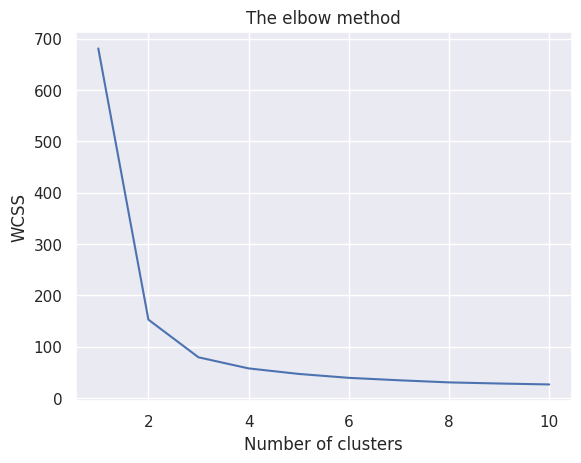

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

AttributeError: ignored

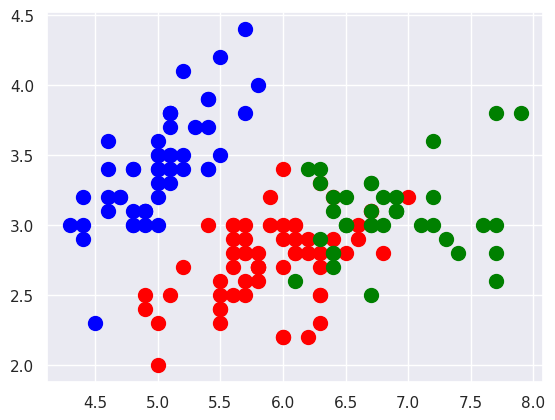

In [ ]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], y_kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legned()

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# kflod for select appropriate number
label_encoder = preprocessing.LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
x = df.iloc[:,0:5]
y = df['species']

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=40)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred= model.predict(x_test)

In [ ]:
pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [ ]:
accuracy_score(y_test, pred) * 100

100.0

# 9
Extra credit: Using the US Census dataset from the UCI repository: https://archive.ics.uci.edu/ml/datasets/US+Census+Data+%281990%29
a. 	Generate a screeplot (horizontal axis is number of clusters and vertical axis is sum of squared distance between each point and the cluster centroid). Use the screeplot to choose the appropriate number of clusters and interpret the results. 
b. 	The above technique may be prone to overfitting. Use 10-fold cross-validation to select the appropriate number of clusters and interpret the results.

In [13]:
path = "/content/drive/My Drive/EMSE6575/UScensus.csv"
df = pd.read_csv(path)

In [14]:
df.describe()

caseid         dAge    dAncstry1    dAncstry2       iAvail  \
count   8100.000000  8100.000000  8100.000000  8100.000000  8100.000000   
mean   24048.500000     3.830617     3.229383     1.566420     0.123457   
std     2338.412923     2.054980     4.011494     1.680024     0.675588   
min    19999.000000     0.000000     0.000000     1.000000     0.000000   
25%    22023.750000     2.000000     1.000000     1.000000     0.000000   
50%    24048.500000     4.000000     1.000000     1.000000     0.000000   
75%    26073.250000     6.000000     3.000000     2.000000     0.000000   
max    28098.000000     7.000000    11.000000    12.000000     4.000000   

          iCitizen       iClass      dDepart     iDisabl1     iDisabl2  ...  \
count  8100.000000  8100.000000  8100.000000  8100.000000  8100.000000  ...   
mean      0.274568     1.229630     1.390617     1.424074     1.459506  ...   
std       0.944526     1.763204     1.755456     0.849330     0.851755  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     1.000000     1.000000  ...   
50%       0.000000     1.000000     0.000000     2.000000     2.000000  ...   
75%       0.000000     1.000000     3.000000     2.000000     2.000000  ...   
max       4.000000     9.000000     5.000000     2.000000     2.000000  ...   

         iTmpabsnt    dTravtime     iVietnam      dWeek89      iWork89  \
count  8100.000000  8100.000000  8100.000000  8100.000000  8100.000000   
mean      0.788272     1.484444     0.033210     0.821975     0.996790   
std       1.308925     1.966287     0.179195     0.859086     0.688386   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     1.000000   
50%       0.000000     0.000000     0.000000     1.000000     1.000000   
75%       3.000000     3.000000     0.000000     2.000000     1.000000   
max       3.000000     6.000000     1.000000     2.000000     2.000000   

          iWorklwk        iWWII     iYearsch     iYearwrk     dYrsserv  
count  8100.000000  8100.000000  8100.000000  8100.000000  8100.000000  
mean      1.080494     0.040494     8.414074     1.805556     0.141605  
std       0.747512     0.197127     4.125504     2.104703     0.405935  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     5.000000     1.000000     0.000000  
50%       1.000000     0.000000    10.000000     1.000000     0.000000  
75%       2.000000     0.000000    11.000000     2.000000     0.000000  
max       2.000000     1.000000    17.000000     7.000000     2.000000  

[8 rows x 69 columns]

In [15]:
vals = df.drop(['caseid'], axis=1).values
df_cluster = KMeans(n_clusters=5)
df_cluster.fit(vals)

labs = df_cluster.labels_
centroids = df_cluster.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
centroid_df = pd.DataFrame(columns = df.drop(['caseid'], axis=1).columns, data = centroids)

In [17]:
centroid_df.describe()

dAge  dAncstry1  dAncstry2    iAvail      iCitizen    iClass  \
count  5.000000   5.000000   5.000000  5.000000  5.000000e+00  5.000000   
mean   3.331746   3.549571   1.518078  0.101170  7.556467e-01  0.975484   
std    1.943611   0.707343   0.237281  0.054529  1.530435e+00  0.840188   
min    1.179076   2.920683   1.121377  0.035944  7.993606e-15  0.053360   
25%    1.233202   3.131157   1.518900  0.057312  1.706827e-02  0.070603   
50%    4.629725   3.142490   1.573123  0.105072  1.200257e-01  1.429348   
75%    4.692029   3.954710   1.630522  0.144578  1.501976e-01  1.608247   
max    4.924699   4.598814   1.746470  0.162944  3.490942e+00  1.715863   

        dDepart  iDisabl1  iDisabl2  iEnglish  ...  iTmpabsnt  dTravtime  \
count  5.000000  5.000000  5.000000  5.000000  ...   5.000000   5.000000   
mean   1.136502  1.191291  1.216500  0.427843  ...   0.679489   1.230420   
std    0.940894  0.918422  0.938538  0.680146  ...   0.452202   1.075921   
min    0.096838  0.177866  0.183794  0.089347  ...   0.177792   0.053360   
25%    0.114891  0.193196  0.193196  0.104418  ...   0.191700   0.053915   
50%    1.817029  1.829324  1.880011  0.126444  ...   0.989691   1.930126   
75%    1.817269  1.862952  1.910643  0.175889  ...   0.992972   2.015060   
max    1.836483  1.893116  1.914855  1.643116  ...   1.045290   2.099638   

           iVietnam   dWeek89   iWork89  iWorklwk         iWWII   iYearsch  \
count  5.000000e+00  5.000000  5.000000  5.000000  5.000000e+00   5.000000   
mean   2.514821e-02  0.647529  0.846032  0.947170  2.908802e-02   7.319580   
std    2.925819e-02  0.559293  0.631657  0.516092  3.305653e-02   3.657107   
min   -5.689893e-16  0.031621  0.152118  0.349807 -4.857226e-17   3.317073   
25%    0.000000e+00  0.046213  0.158103  0.415020  4.440892e-16   3.409091   
50%    2.173913e-02  0.949275  1.273482  1.317029  2.173913e-02   9.148551   
75%    3.321879e-02  1.095074  1.284137  1.322165  4.639175e-02   9.953608   
max    7.078313e-02  1.115462  1.362319  1.331827  7.730924e-02  10.769578   

       iYearwrk      dYrsserv  
count  5.000000  5.000000e+00  
mean   1.592269  1.044159e-01  
std    1.088059  1.224798e-01  
min    0.391528 -3.608225e-16  
25%    0.432806  6.418485e-04  
50%    2.241123  7.971014e-02  
75%    2.269076  1.480527e-01  
max    2.626812  2.936747e-01  

[8 rows x 68 columns]

In [22]:
df_std = (centroid_df - centroid_df.mean()) / centroid_df.std()

In [27]:
df_std.shape

(5, 68)

In [18]:
X = centroid_df.iloc[:, [3,4]].values

In [31]:
from sklearn.cluster import KMeans
ssd = []
for k in range(2,11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

ValueError: ignored

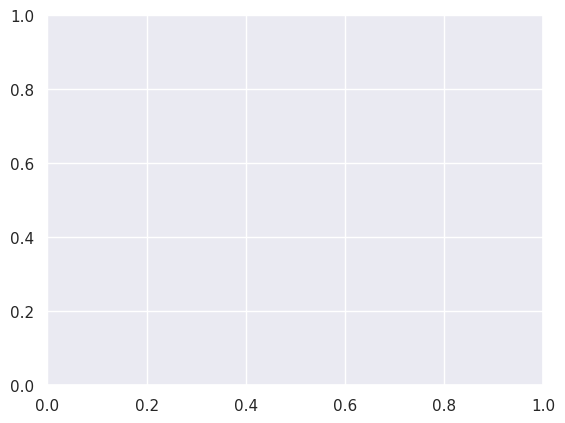

In [52]:
plt.plot(range(2,11), centroid_df, marker='o')
plt.xlabel("N Cluster")
plt.ylabel("Sum")
plt.show()

# 10
Extra credit: Collect Twitter data using a measure of your choice and perform a k-means clustering. Use TF-IDF as appropriate.
a. 	Using the techniques identified above, determine the appropriate number of clusters.
b. 	One heuristic for determining the number of clusters for text data is m*n/t, where m is the number of terms, n is the number of documents, and t is the number of nonzero entries in the term-document matrix. How does this heuristic perform compared to the screeplot technique?

In [41]:
import re
import spacy
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
import en_core_web_sm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

#11
Do the sample LDA demo at: http://scikit-learn.org/stable/auto_examples/applications/topics_extraction_with_nmf_lda.html#example-applications-topics-extraction-with-nmf-lda-py  (you can, but need not, skip the NMF part)
a. 	Carry out the same analysis with 5 topics, and with 50 topics.
b. 	Carry out the same analysis with hyperparameter values a = 50/T and b = W/2000

In [ ]:
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [ ]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))


Loading dataset...
done in 12.849s.


In [ ]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


Extracting tf-idf features for NMF...
done in 0.637s.
Extracting tf features for LDA...
done in 0.697s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.374s.


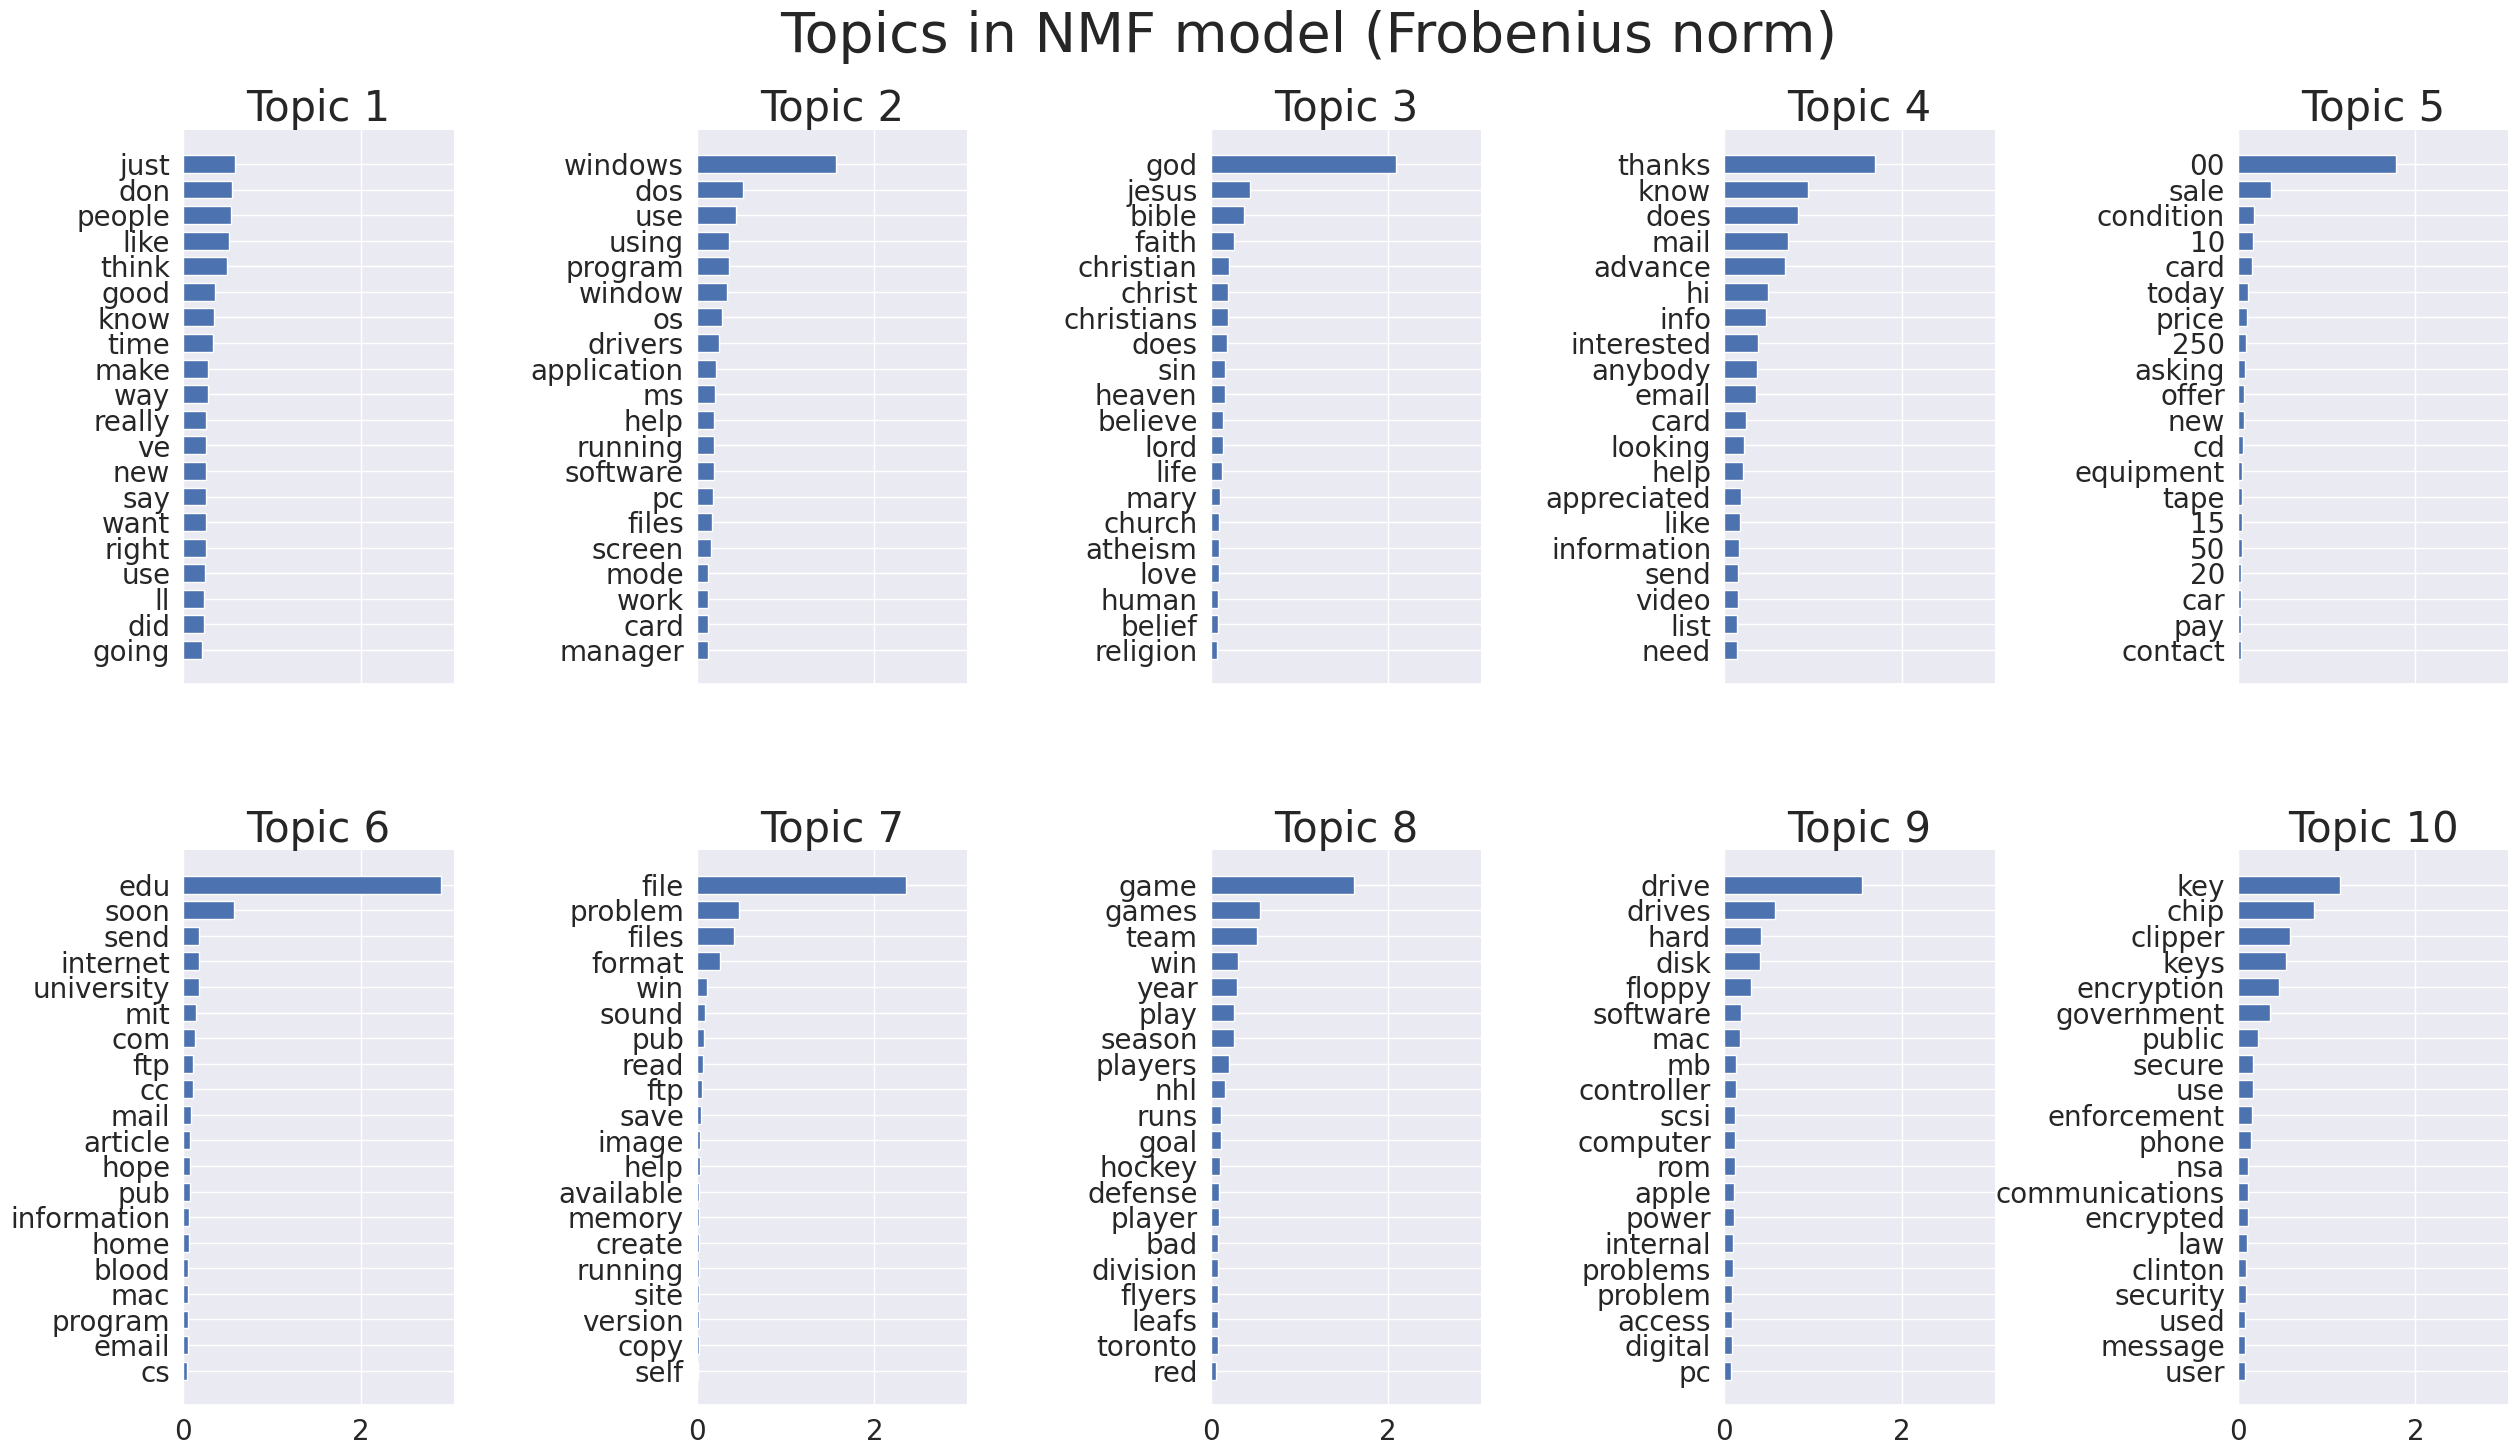



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 2.248s.


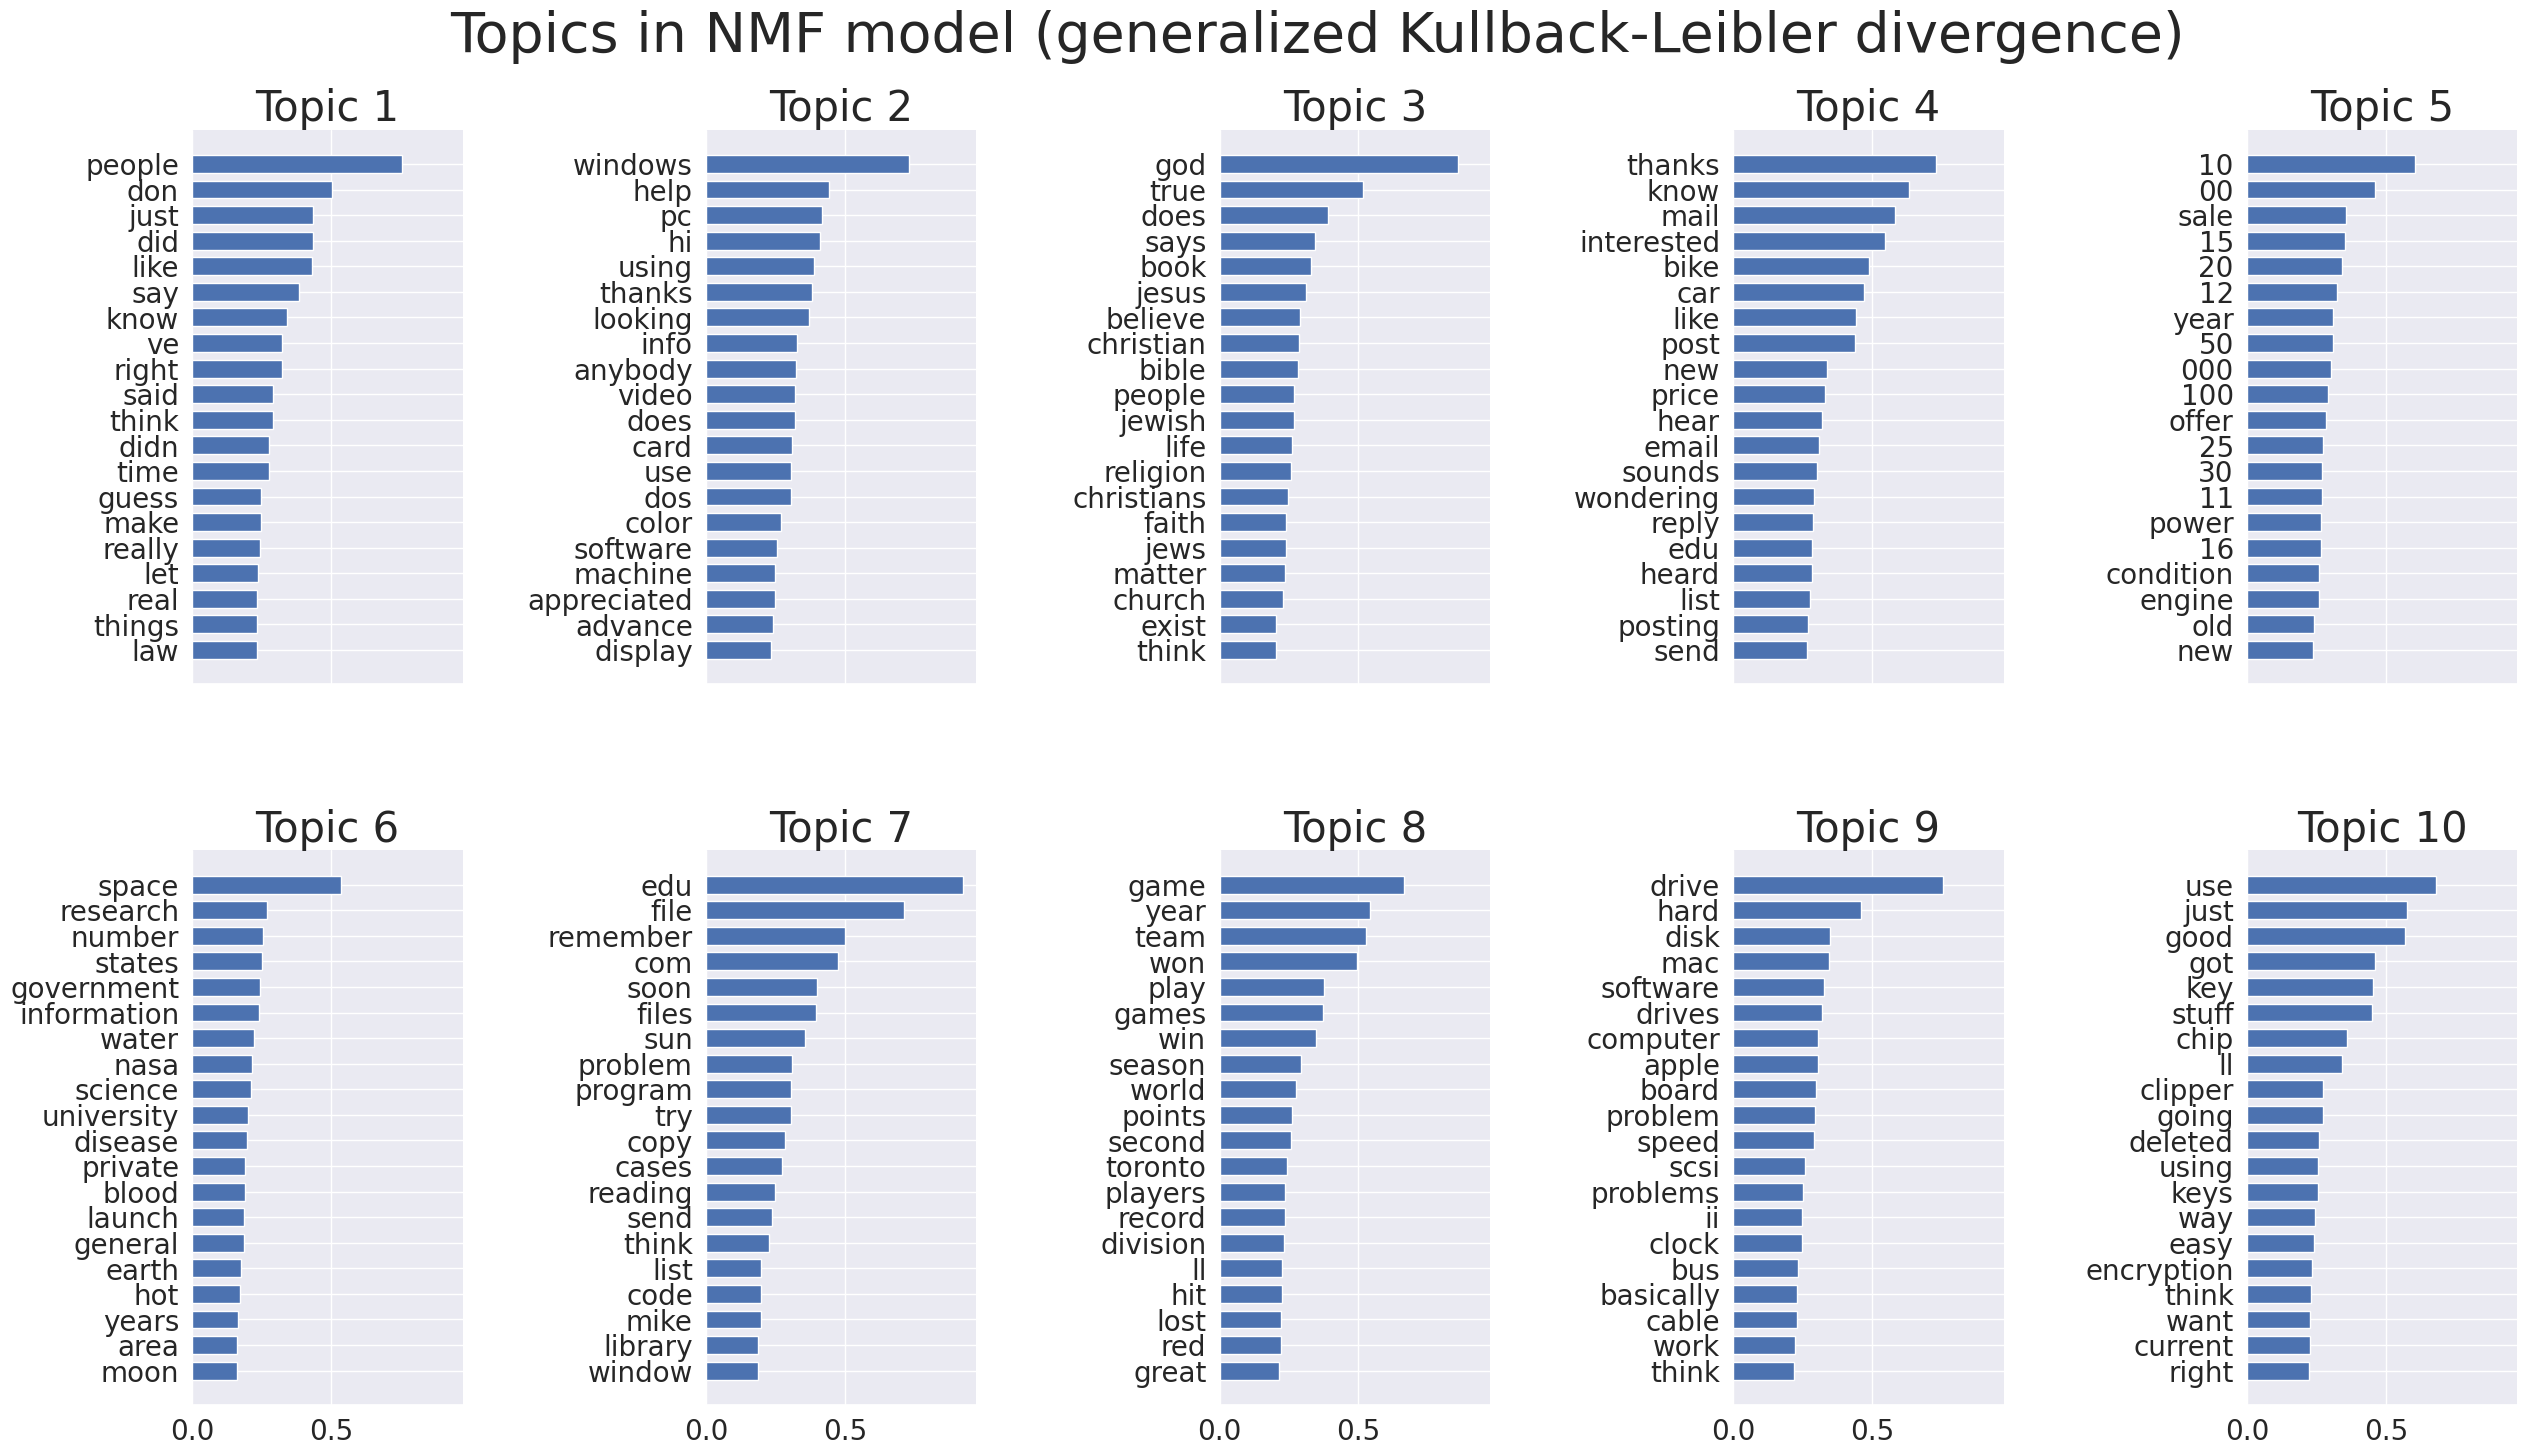

In [ ]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)



 Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.304s.


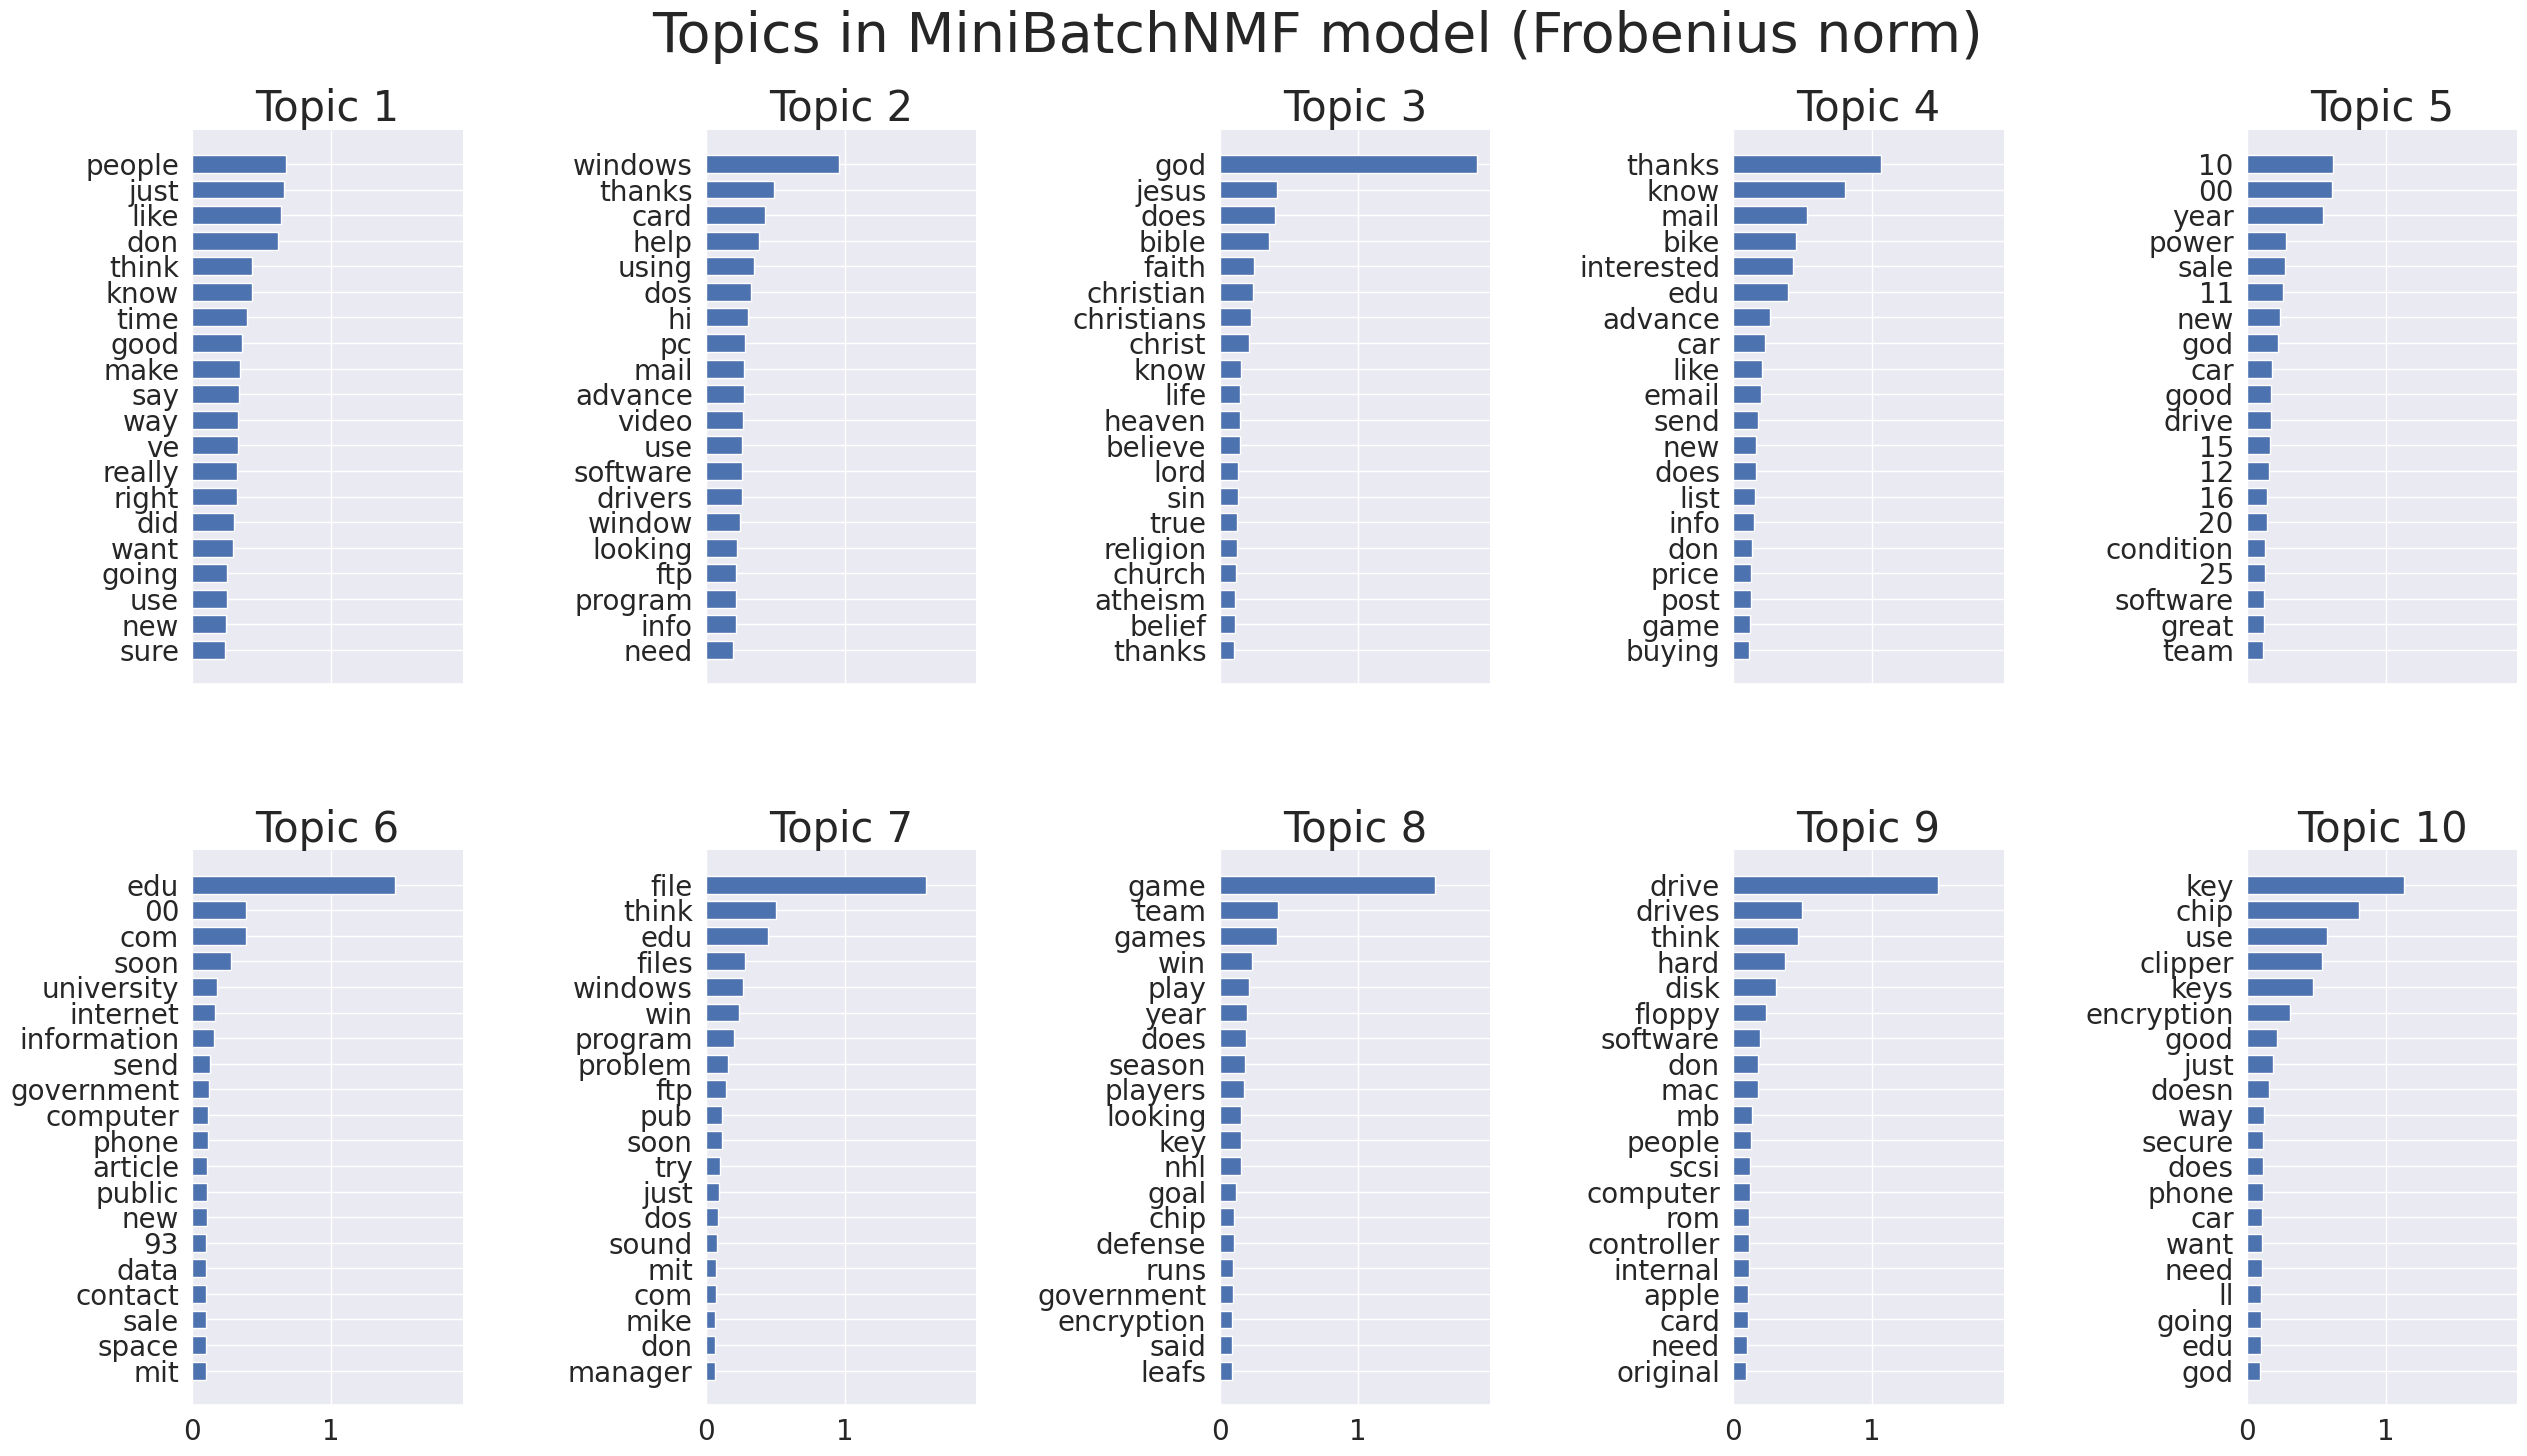



 Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.757s.


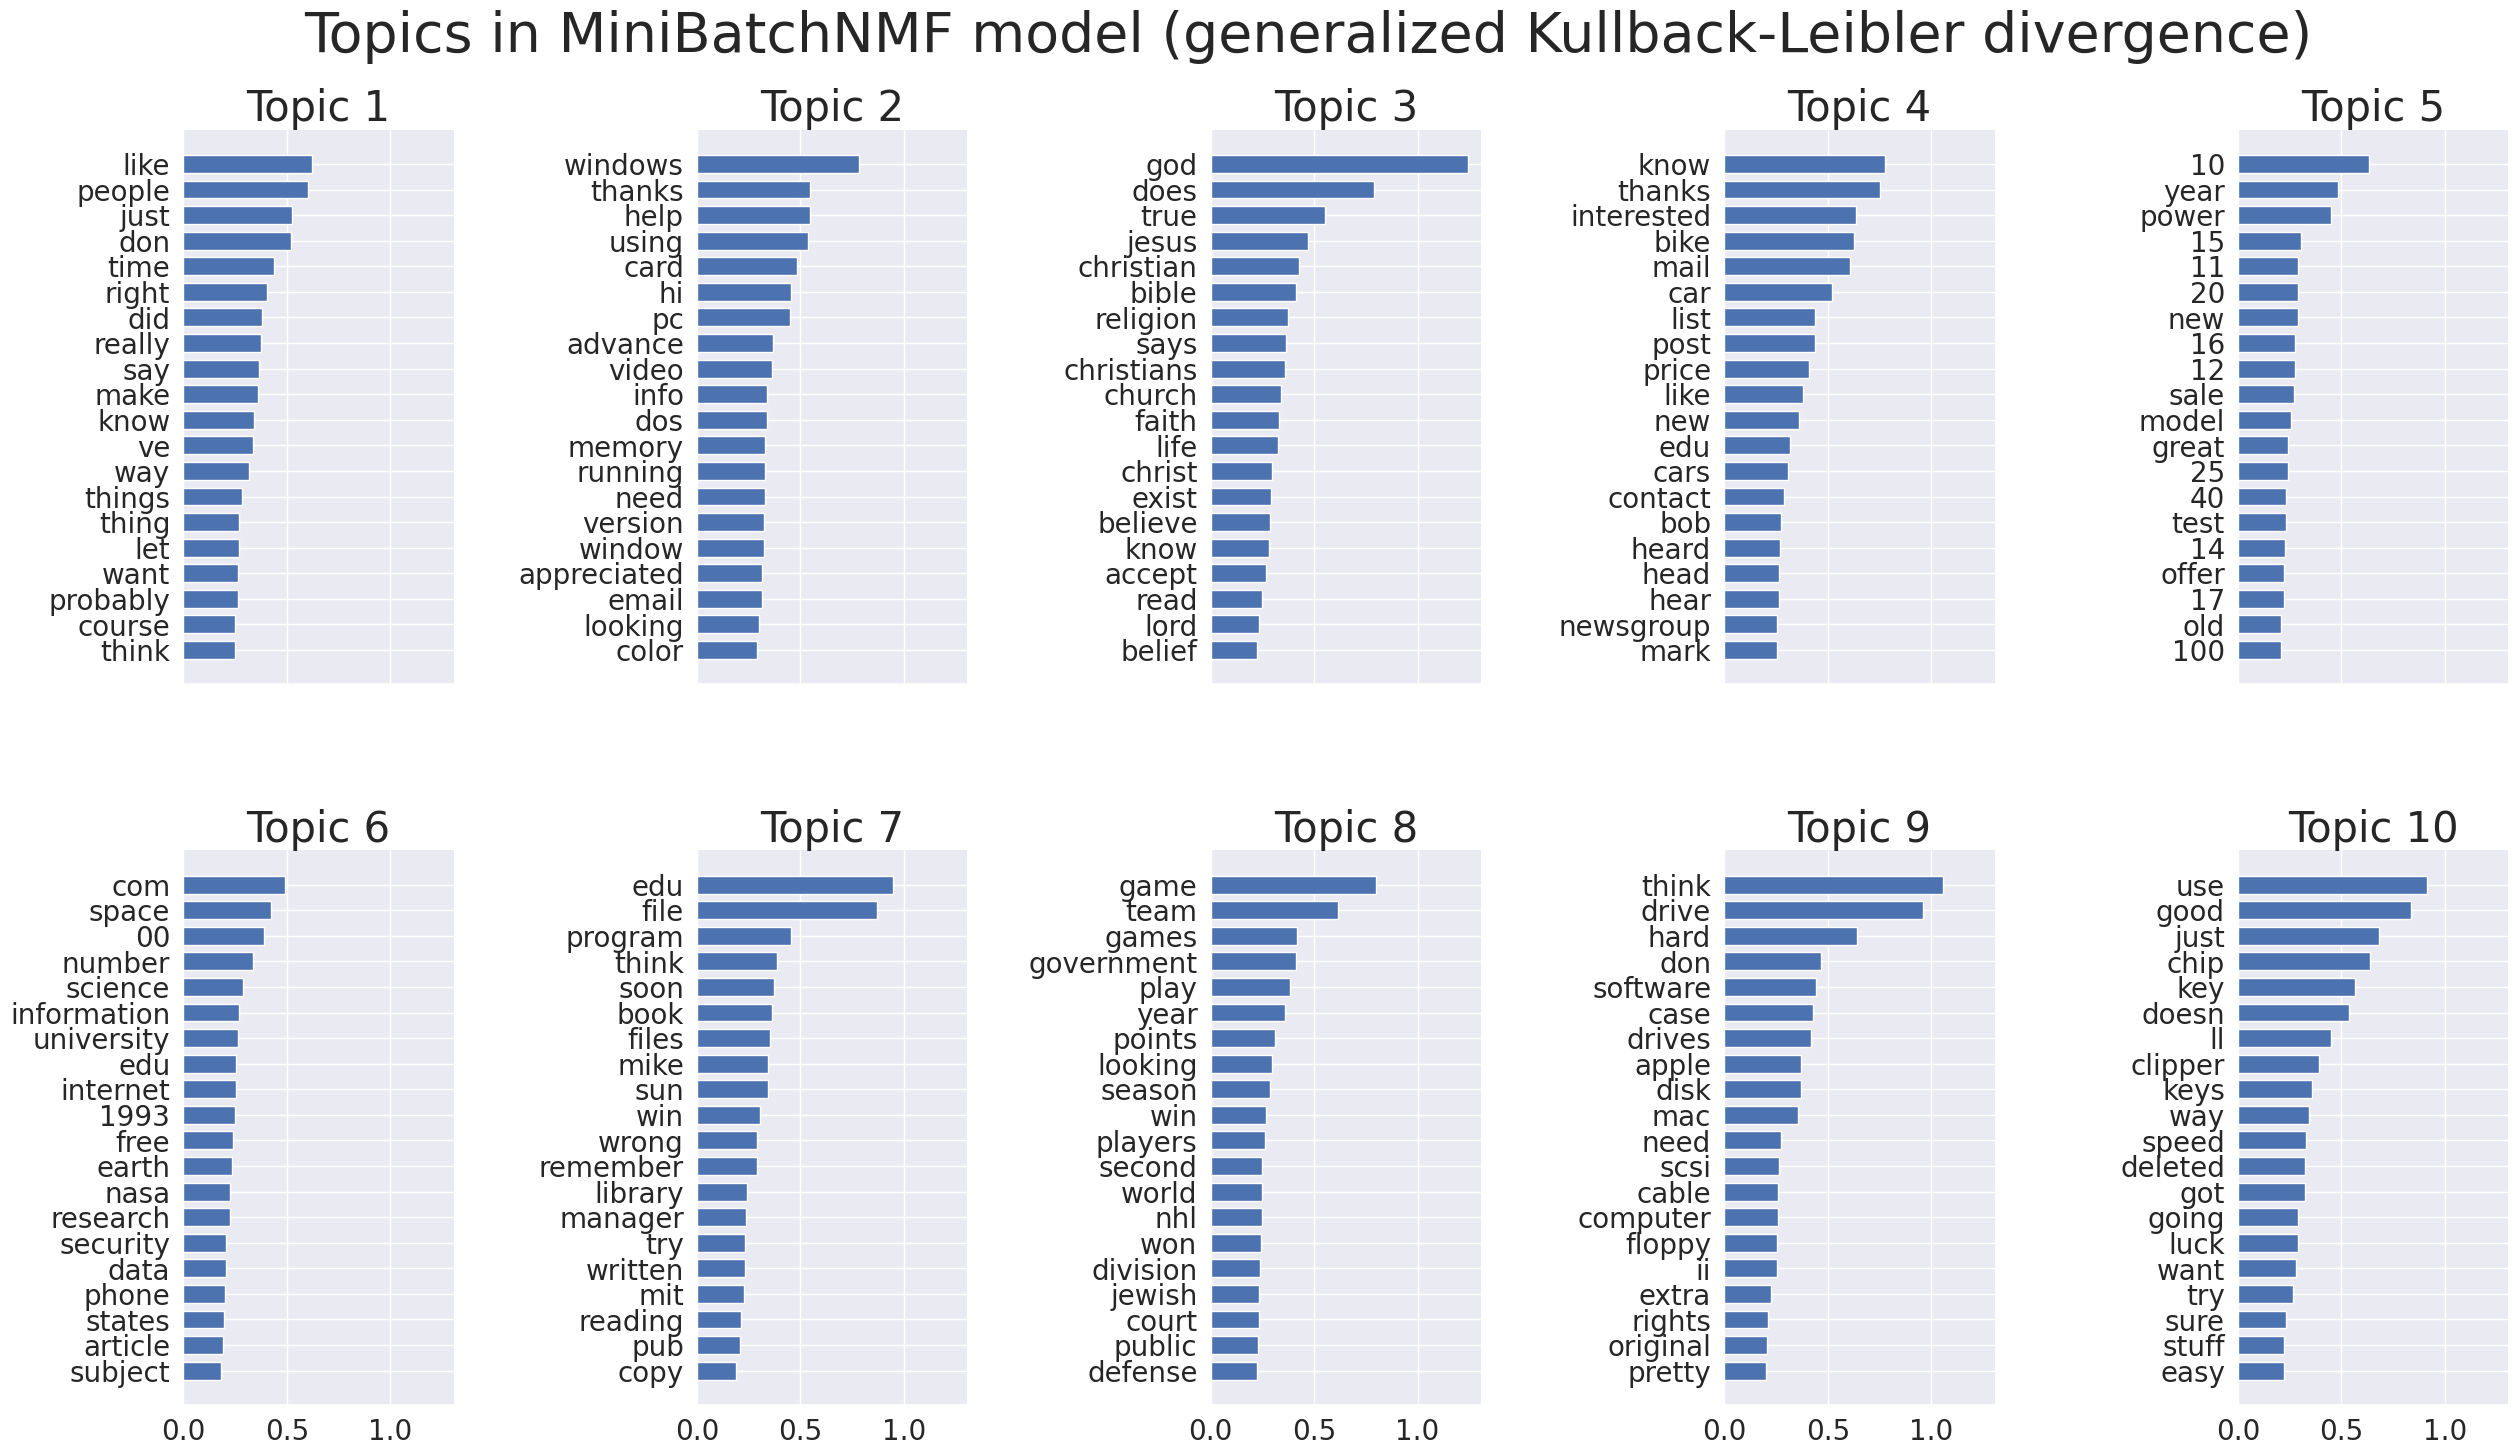



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 3.888s.


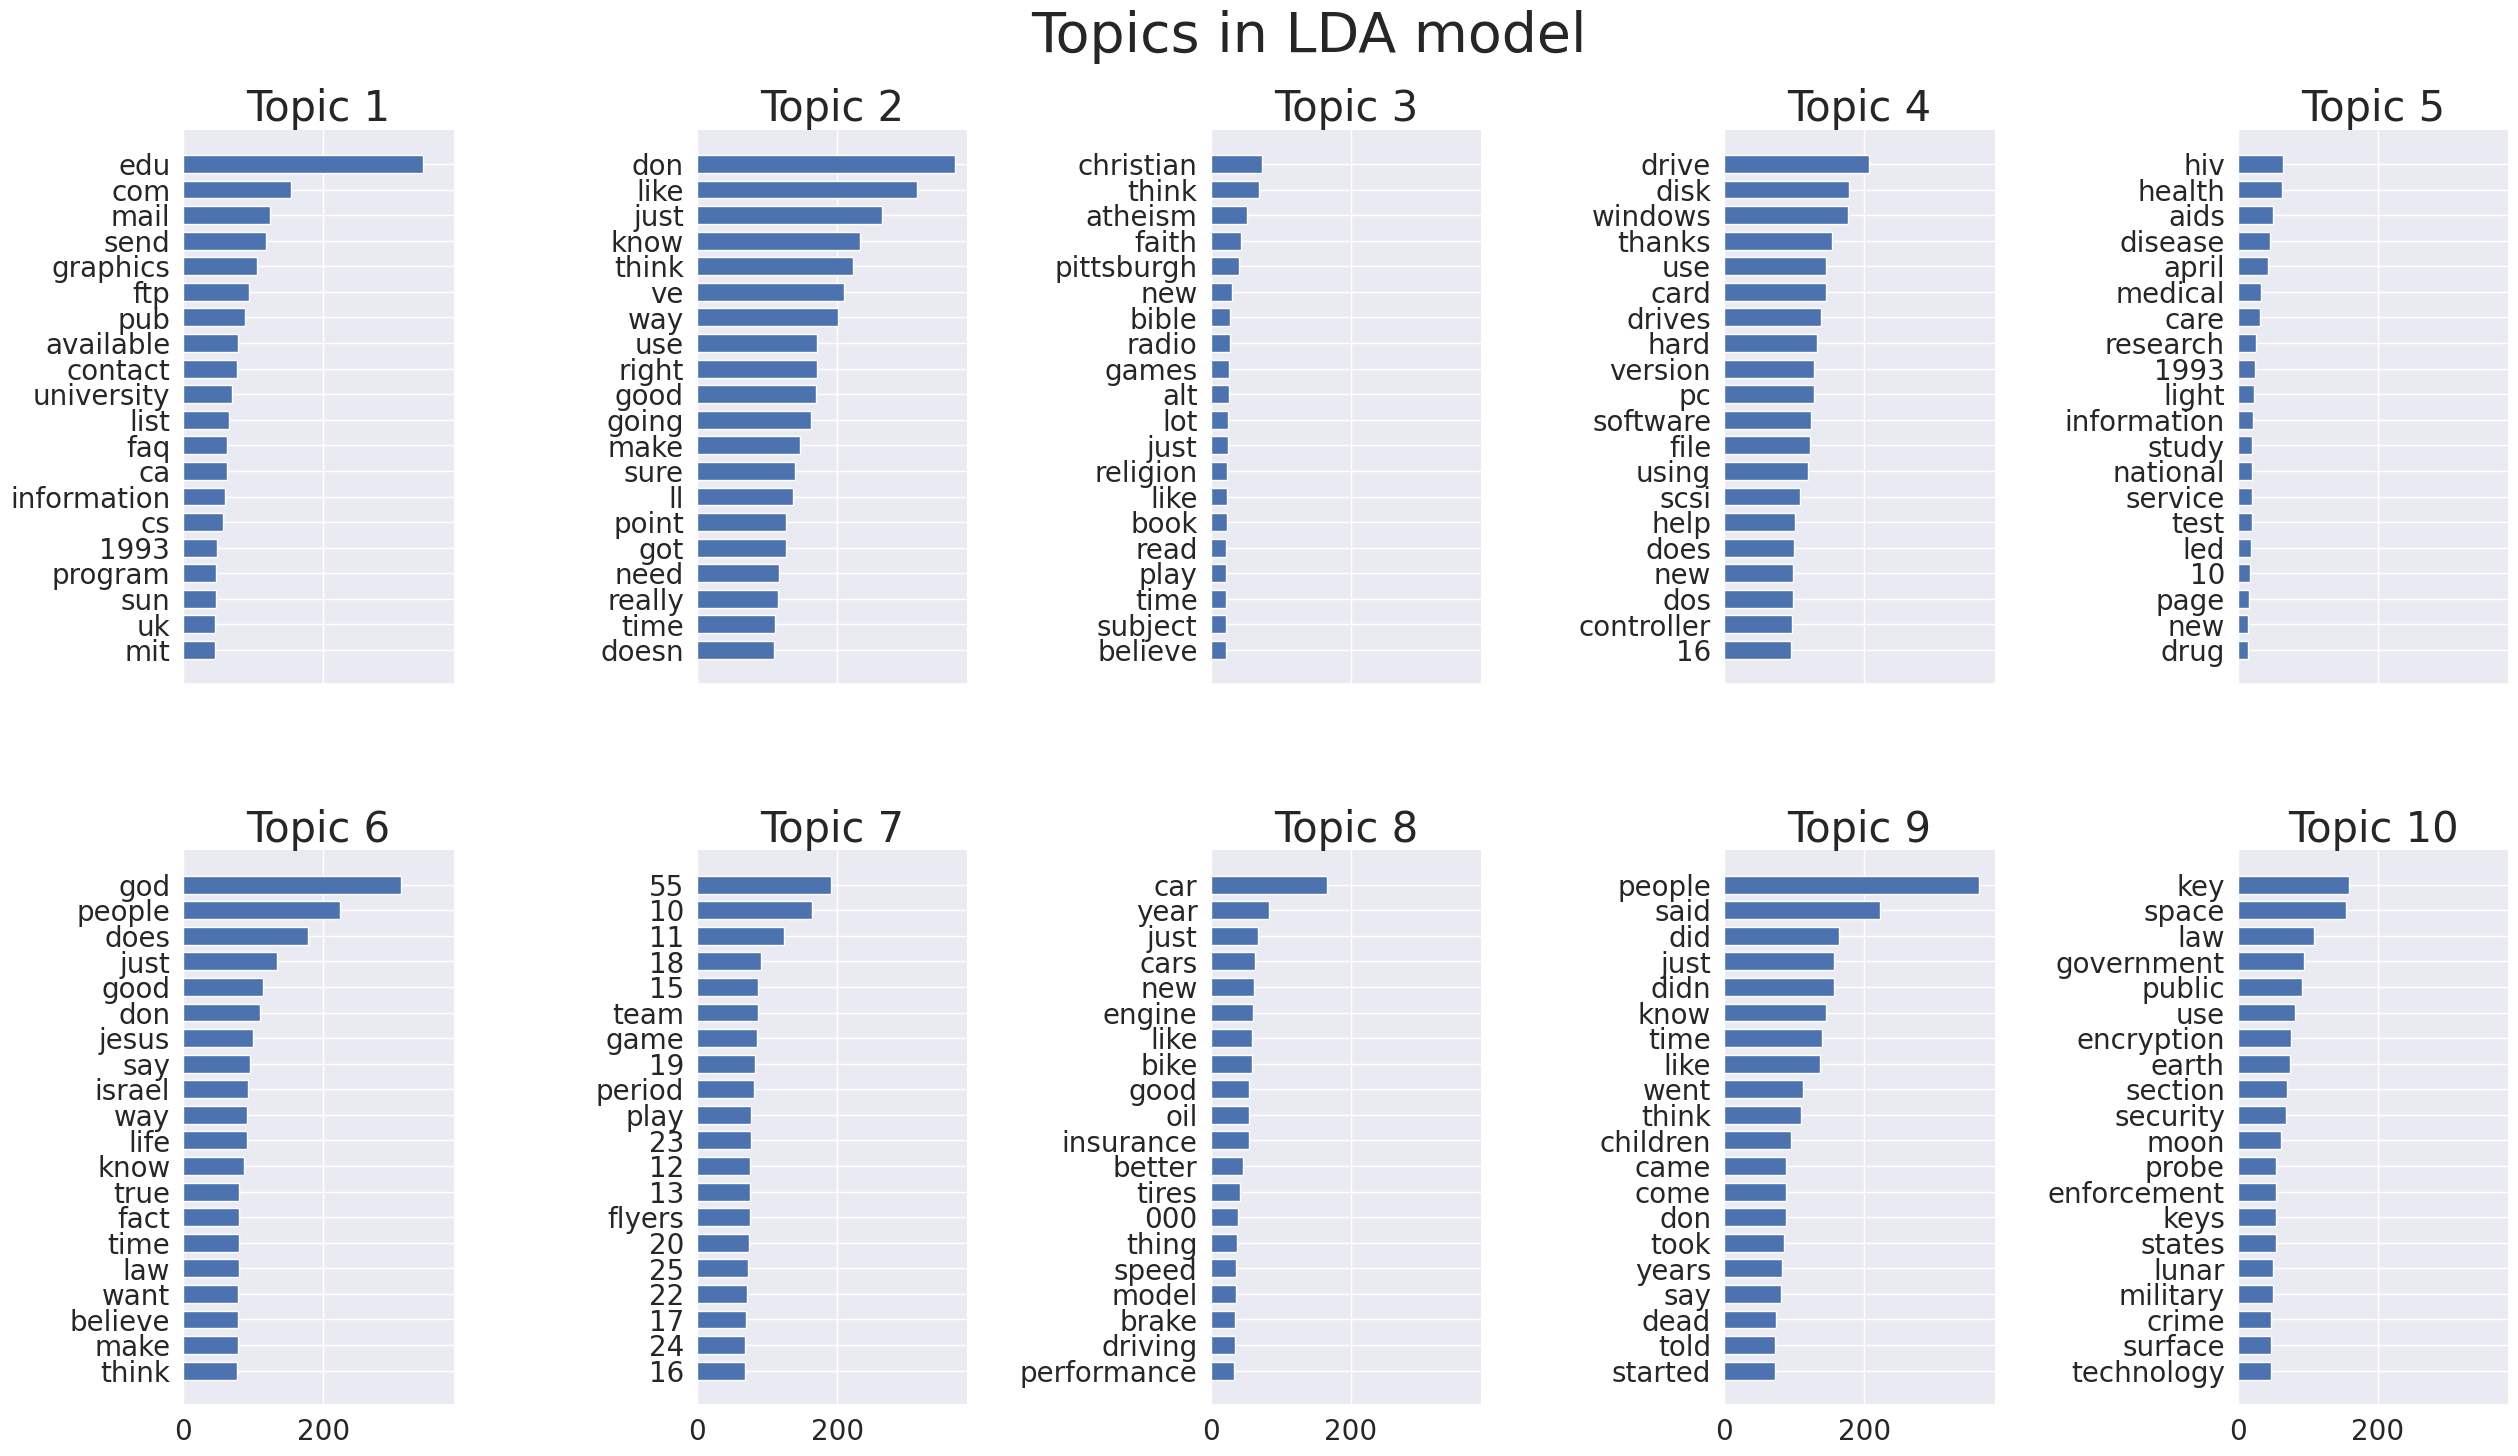

In [ ]:
# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [ ]:
print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

Loading dataset...
done in 2.578s.


analysis with 5 topics

In [ ]:
n_samples = 2000
n_features = 1000
n_components = 5
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [ ]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf-idf features for NMF...
done in 1.955s.


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.560s.


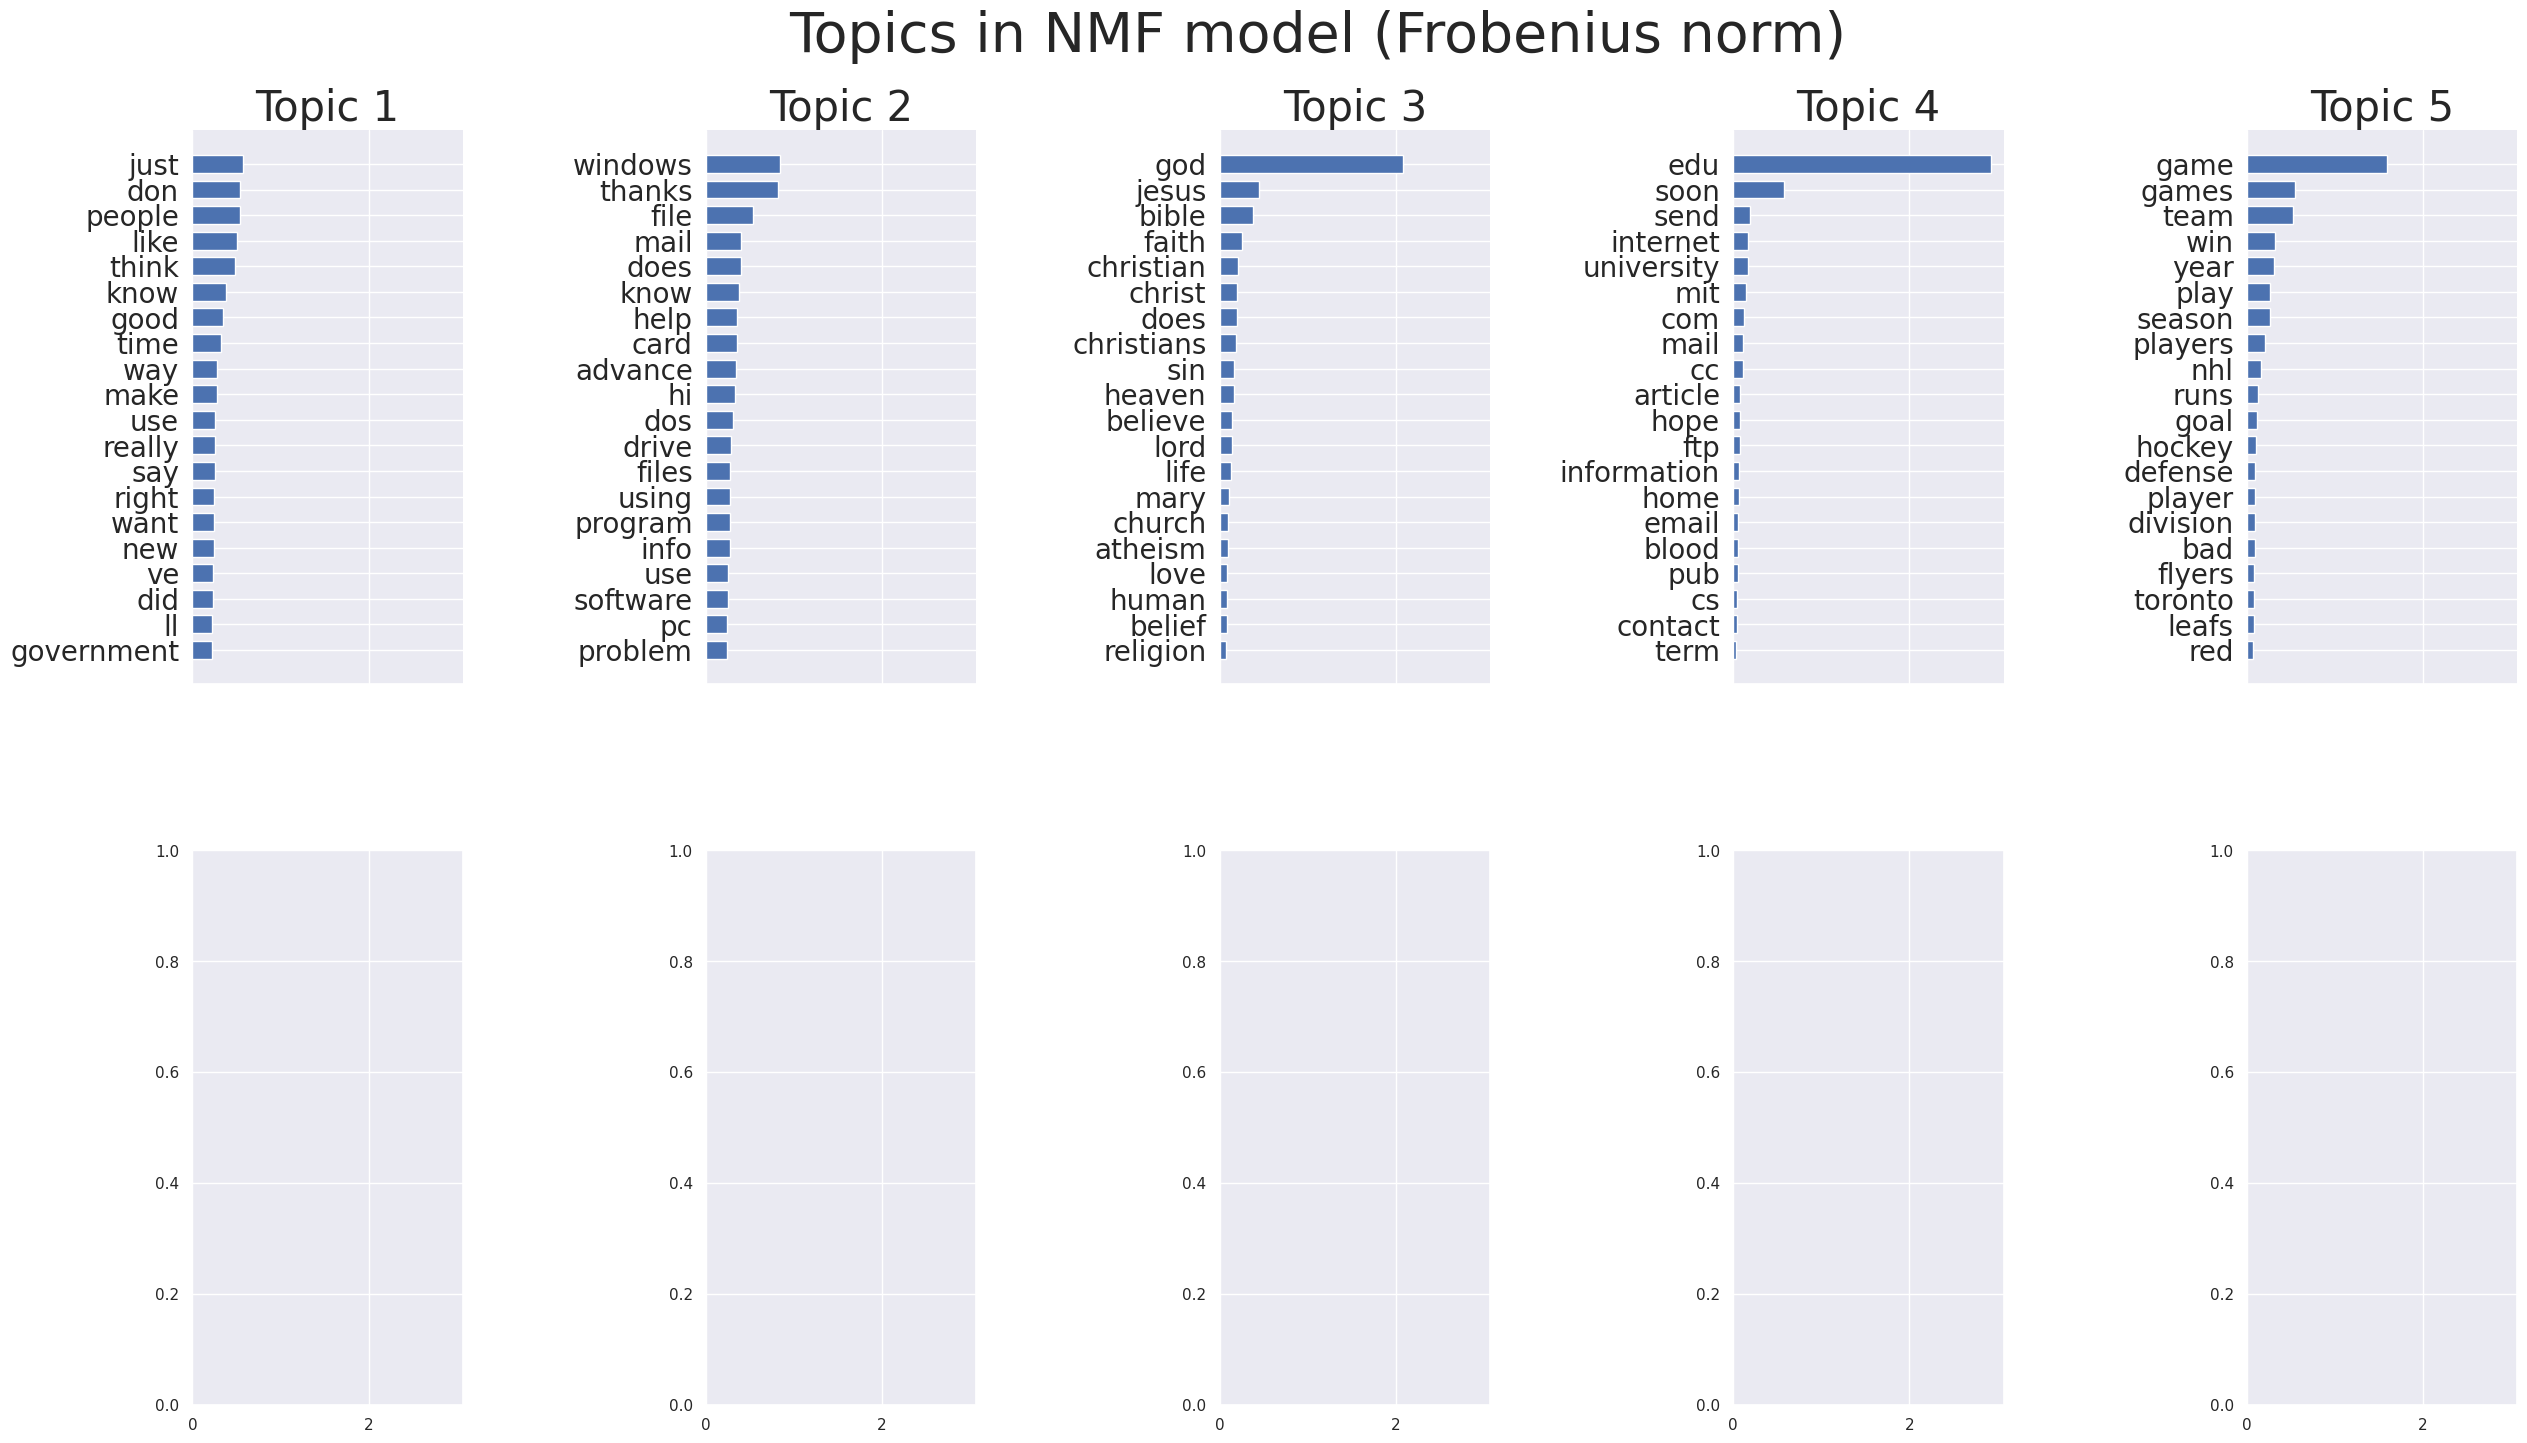

In [ ]:
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

analysis with 50 topics

In [ ]:
n_samples = 2000
n_features = 1000
n_components = 50
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [ ]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf-idf features for NMF...
done in 0.694s.


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


done in 3.426s.


IndexError: ignored

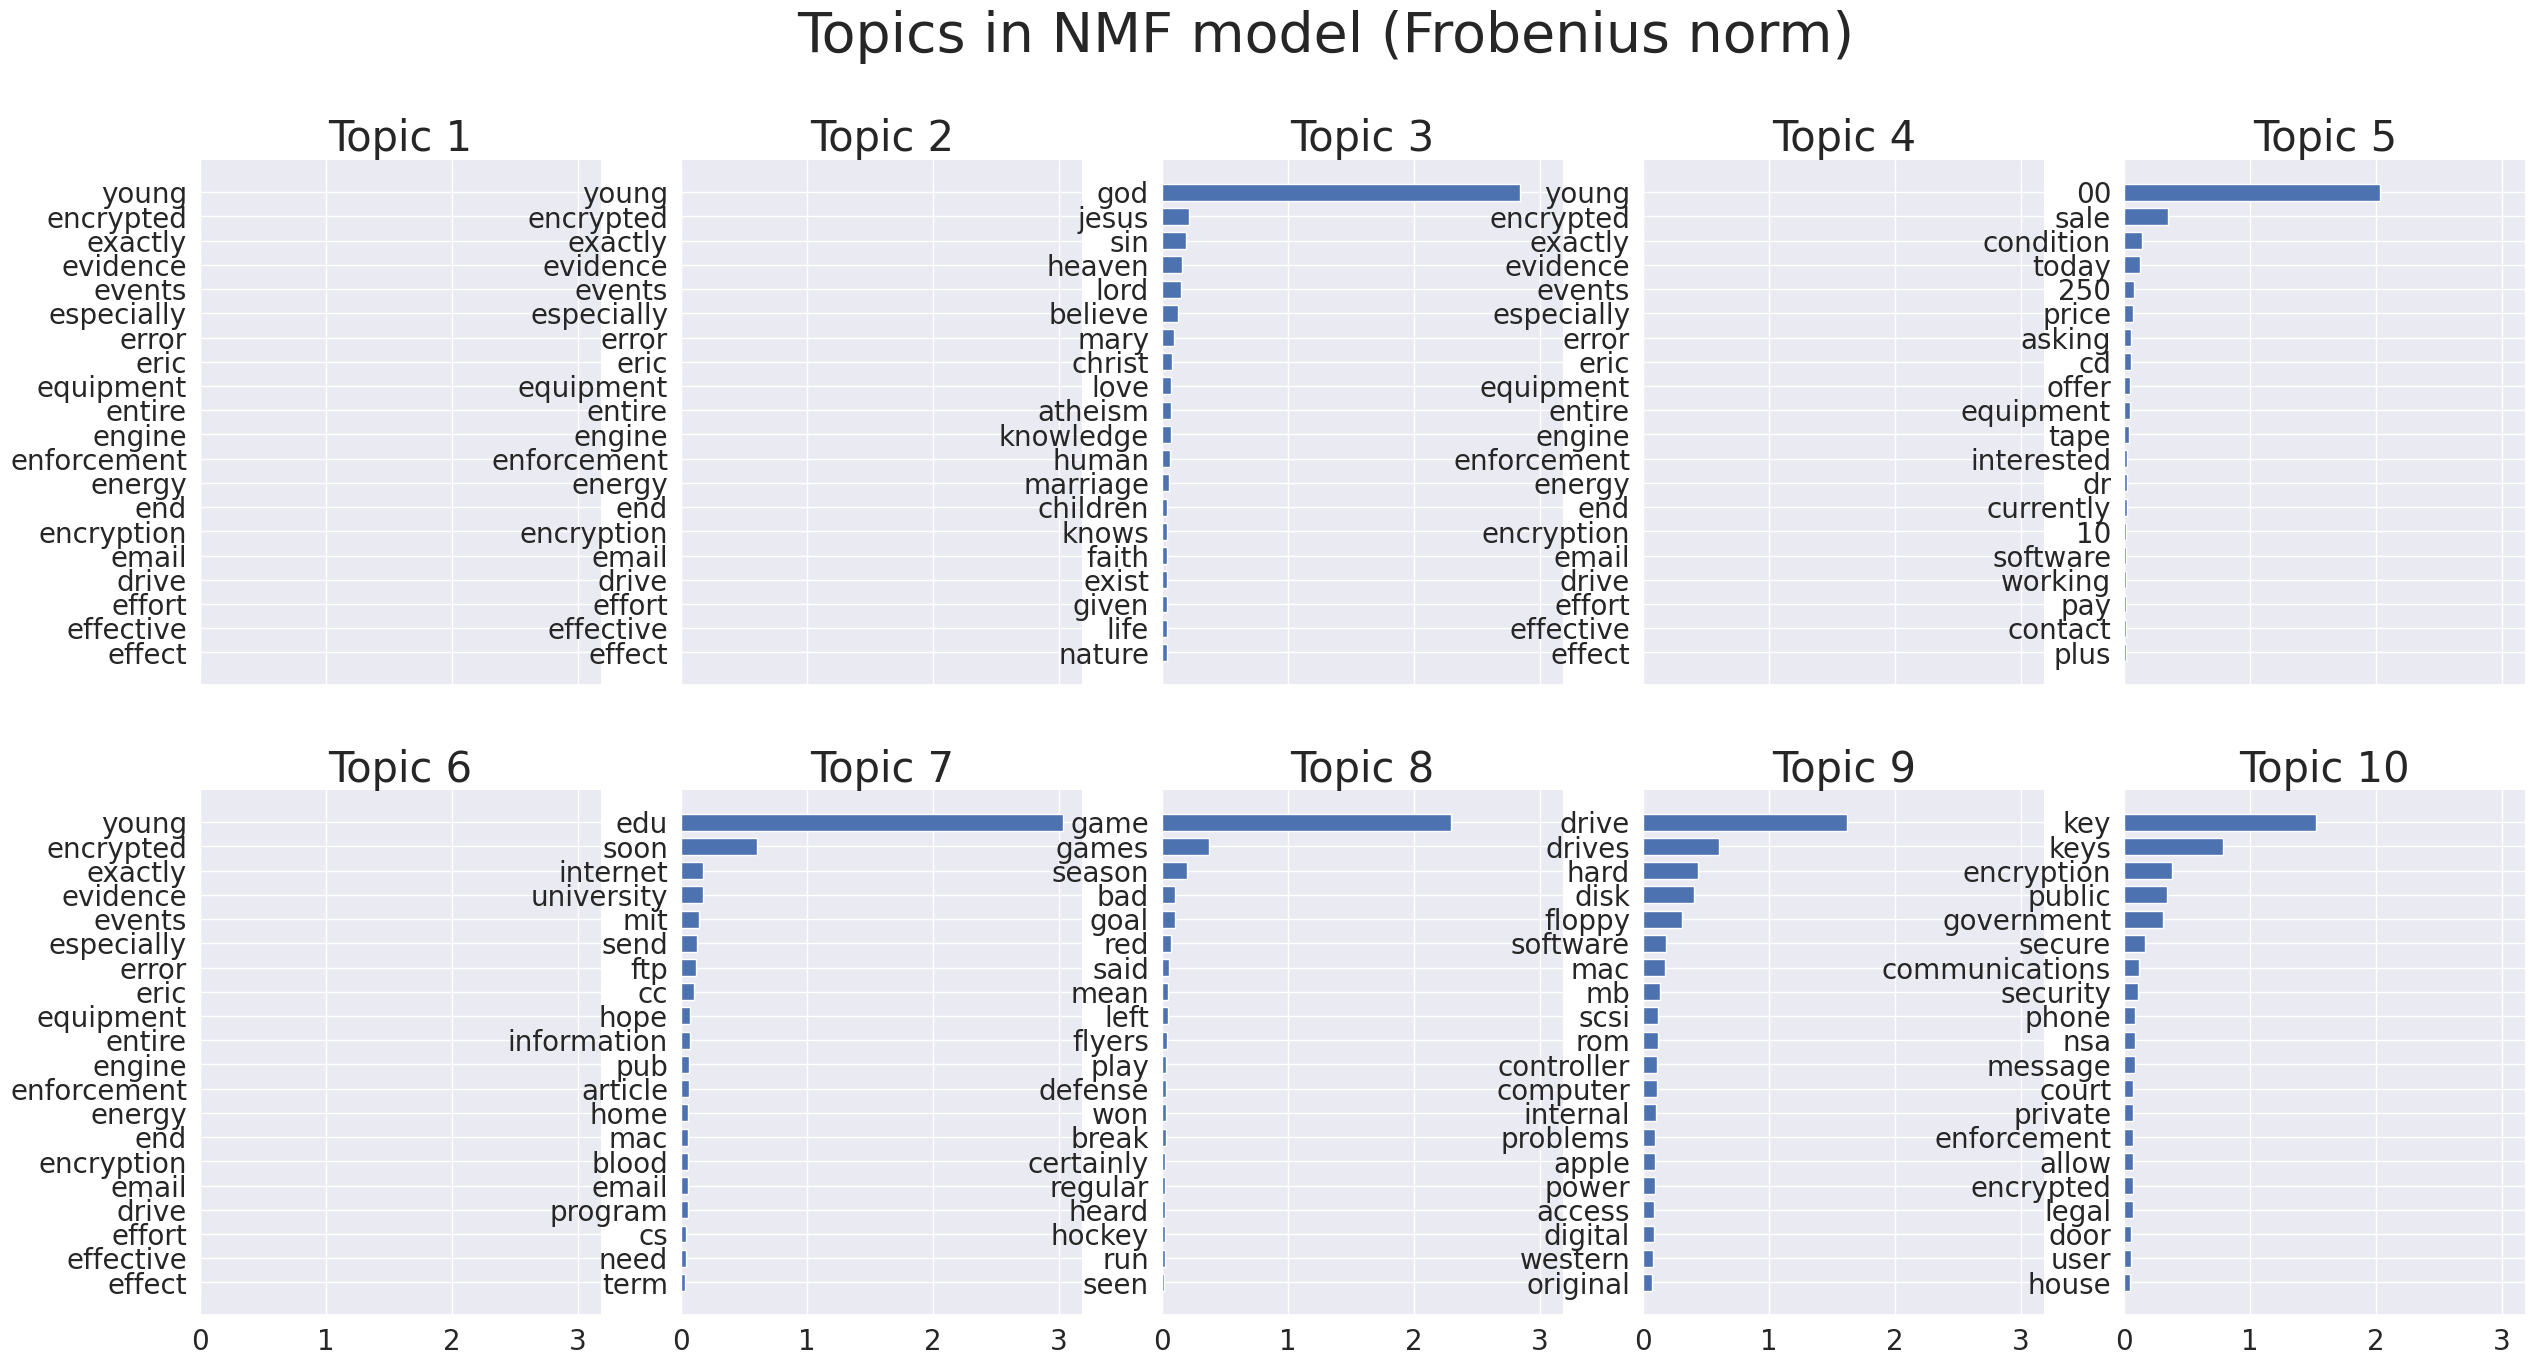

In [ ]:
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

Carry out the same analysis with hyperparameter values a = 50/T and b = W/2000

In [ ]:
n_samples = 2000
n_features = 1000
n_components = 50
n_top_words = 50
batch_size = 128
init = "nndsvda"

In [ ]:
a= 50/
b = [2000,50]/2000

In [ ]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


Extracting tf-idf features for NMF...
done in 0.694s.


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


done in 3.426s.


IndexError: ignored

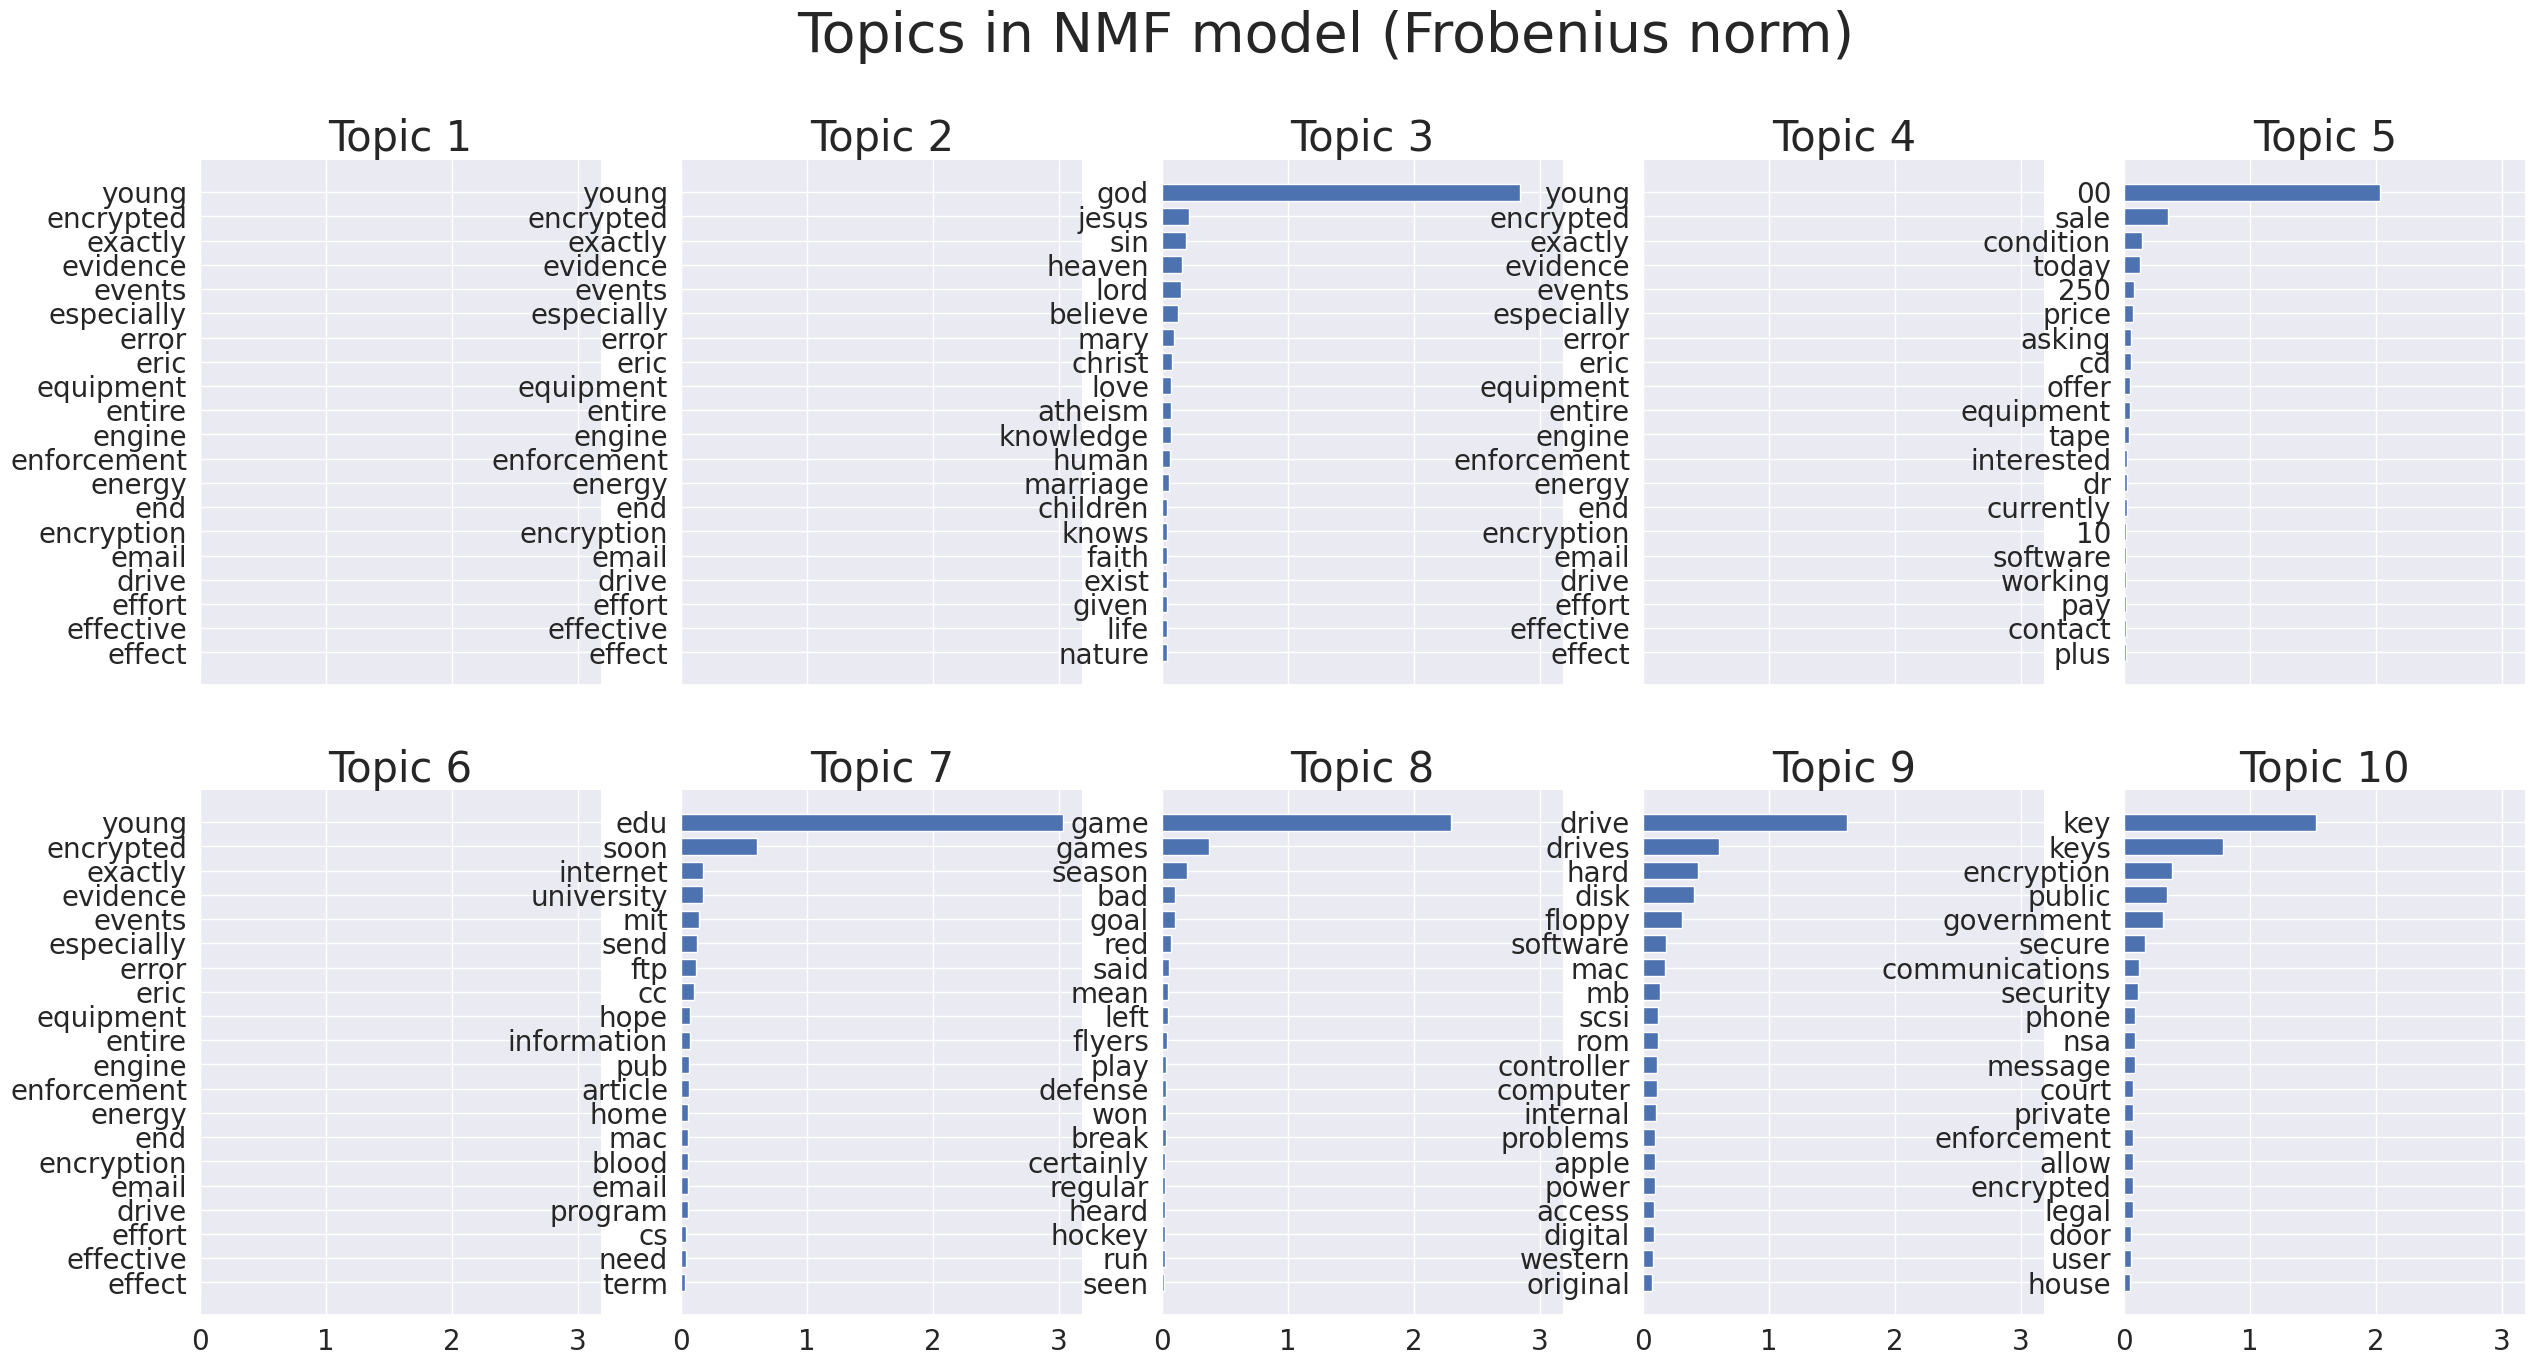

In [ ]:
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

#12
Extra credit: Load the NYSK dataset from https://archive.ics.uci.edu/ml/datasets/NYSK
a. 	Fit a topic model to the data using LDA. Choose the number of topics using Perplexity as a criterion.
b. 	Choose a subset of the most informative topics and plot them over time. What do these topics indicate?

In [55]:
import xml.etree.ElementTree as et

# Parsing the XML into a Pandas dataframe
file = et.parse('nysk.xml')
root = file.getroot()
columns = ["DocID", "Source", "URL", "Title", "Summary", "Date"] # Setting the columns of the Dataframe


In [56]:
summary_list = []
dataset = pd.DataFrame(columns = columns)

In [66]:
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(dataset['Summary'])

In [67]:
train_data, test_data = train_test_split(doc_term_matrix, test_size=0.2)

In [70]:
from sklearn.decomposition import LatentDirichletAllocation
#from sklearn.metrics import perplexity_score
from sklearn.manifold import TSNE

In [71]:
num_topics = 10  # Choose the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online')
lda_model.fit(train_data)

LatentDirichletAllocation(learning_method='online')

In [72]:
perplexity = lda_model.perplexity(test_data)
print(f'Perplexity: {perplexity:.2f}')

Perplexity: 2633.02


In [74]:
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f'Topic {topic_idx}:')
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(', '.join(top_words))

Topic 0:
in, billings, cardiff, general, amp, winter, auto, businesses, singapore, asylum
Topic 1:
news, business, more, for, facebook, to, comment, you, comments, your
Topic 2:
reuters, us, products, news, thomson, com, copyright, international, video, view
Topic 3:
the, of, to, strauss, kahn, imf, in, new, on, dominique
Topic 4:
00, season, apr, gaga, lady, summer, san, francisco, arizona, premiere
Topic 5:
service, fox, et, beaumont, at, america, 11, tornado, texas, school
Topic 6:
the, of, to, and, in, for, at, european, that, from
Topic 7:
in, to, the, of, 2011, and, on, this, may, by
Topic 8:
photos, and, in, games, movies, movie, rises, music, books, flood
Topic 9:
the, of, in, strauss, kahn, and, to, was, that, french


In [57]:
for each_node in root:
    doc = each_node.find("docid").text
    source = each_node.find("source").text
    url = each_node.find("url").text
    title = each_node.find("title").text
    summary = each_node.find("summary").text
    date = each_node.find("date").text
    
    dataset = dataset.append(pd.Series([doc, source, url, title, summary, date],
                                             index = columns), ignore_index = True)

Streaming output truncated to the last 5000 lines.
<ipython-input-57-3920a8e7bc02>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(pd.Series([doc, source, url, title, summary, date],
<ipython-input-57-3920a8e7bc02>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(pd.Series([doc, source, url, title, summary, date],
<ipython-input-57-3920a8e7bc02>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(pd.Series([doc, source, url, title, summary, date],
<ipython-input-57-3920a8e7bc02>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(pd.Series([do

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [60]:
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

sentiment_dict = dict()

for sentence in dataset["Summary"]:
    sent = analyzer.polarity_scores(sentence)

    # Creating a dictionary of sentiment scores and their values
    # Setting up keys
    sentiment_dict.setdefault('Negative_Score', [])
    sentiment_dict.setdefault('Neutral_Score', [])
    sentiment_dict.setdefault('Positive_Score', [])
    sentiment_dict.setdefault('Compound_Score', [])

    # Appending values to the respective keys
    sentiment_dict['Negative_Score'].append(sent.get('neg'))
    sentiment_dict['Neutral_Score'].append(sent.get('neu'))
    sentiment_dict['Positive_Score'].append(sent.get('pos'))
    sentiment_dict['Compound_Score'].append(sent.get('compound'))

sentiment_df = pd.DataFrame.from_dict(sentiment_dict, orient = "columns")
sentiment_df.insert(loc = 0, column = "Article", value = dataset["Summary"])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [61]:
class_list = list()

for m in range(len(sentiment_df)):
    if sentiment_df['Neutral_Score'][m] > 0.5:
        class_list.append("Neutral")
    elif sentiment_df['Negative_Score'][m] > 0.5:
        class_list.append('Negative')
    else:
        class_list.append('Positive')

# Adding the Class Label as the last column to the sentiment dataframe
sentiment_df.insert(loc = 5, column = "Sentiment", value = class_list)

# Storing the sentiment dataframe as a CSV for easy perusal later on
sentiment_df.to_csv('sentiment_analysis.csv', index = False, header = True)

In [62]:
import seaborn as sb

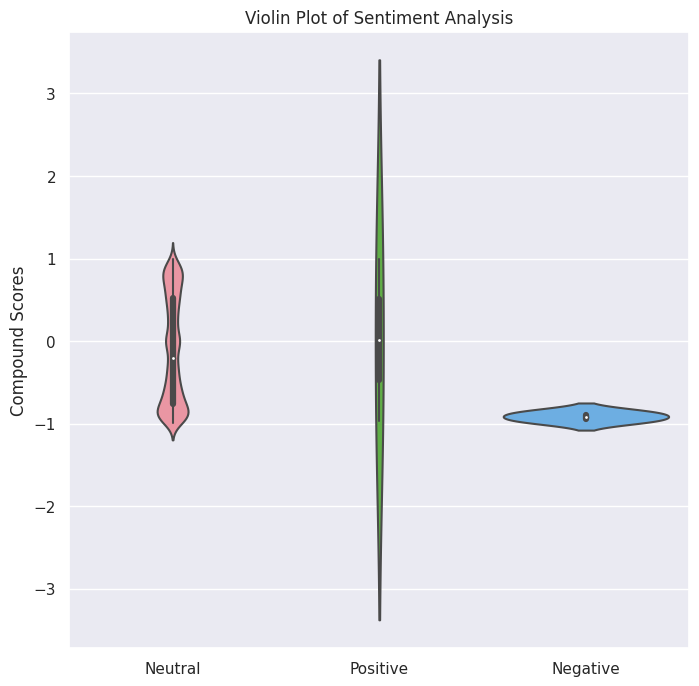

In [63]:
plt.figure(figsize=(8,8))
sb.set_style('darkgrid')
plt.title("Violin Plot of Sentiment Analysis")
sb.violinplot(x = sentiment_df.iloc[:, -1].values, y = sentiment_df.iloc[:, -2].values,
           data = sentiment_df, palette = sb.set_palette('magma', n_colors = 1))
plt.ylabel("Compound Scores")
plt.show()

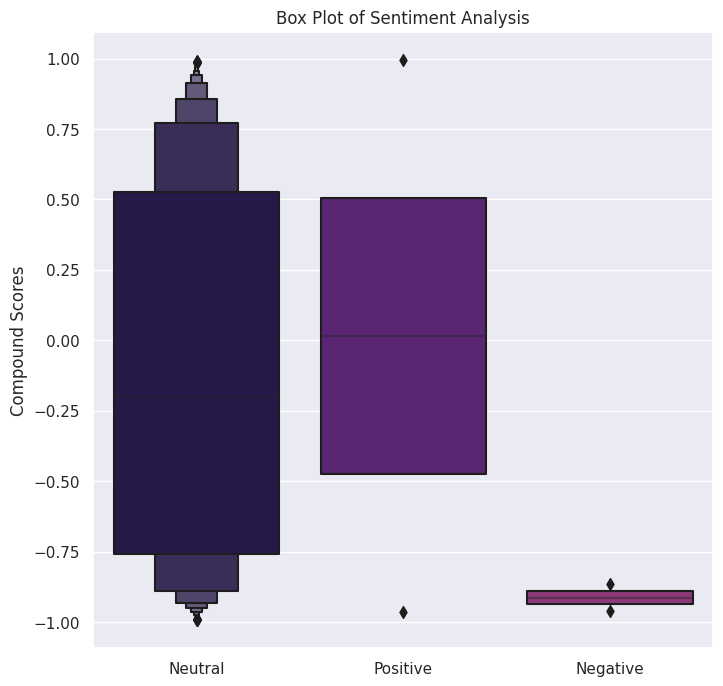

In [64]:
plt.figure(figsize=(8,8))
sb.set_style('darkgrid')
plt.title("Box Plot of Sentiment Analysis")
sb.boxenplot(x = sentiment_df.iloc[:, -1].values, y = sentiment_df.iloc[:, -2].values,
           data = sentiment_df, palette = sb.set_palette('magma', n_colors = 6))
plt.ylabel("Compound Scores")
plt.show()